# Introduction

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study,
apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic
understanding of risk analytics in banking and financial services and understand how data is used to
minimise the risk of losing money while lending to customers.

# Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history.
Because of that, some consumers use it as their advantage by becoming a defaulter.
Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. 
You have to use EDA to analyse the patterns present in the data.This will ensure that the applicants capable of repaying 
the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile.
Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

1. The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

2. All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. Approved: The Company has approved loan Application

2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind 
   about the loan or in some cases due  to a higher risk of the client he received worse pricing which he did not want.

3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

4. Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

# Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments
which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants)
at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default,
i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its 
portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

# Data Understanding

This dataset has 3 files as explained below: 

1. 'application_data.csv' 
    contains all the information of the client at the time of application.
    The data is about whether a client has payment difficulties.

 2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the          previous application had been Approved, Cancelled, Refused or Unused offer.

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

# Results Expected by Learners

1. Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach  briefly.

2. Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

1. Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

2. Identify if there is data imbalance in the data. Find the ratio of data imbalance.

Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

Hint: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

1. Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

2. Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing. 

3. Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

# IMPORTING ALL REQUIRED MODULES

In [1]:
# Importing all the important libraries like numpy, pandas, matlplolib, and warnings 

import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
# To suppress warnings

import warnings   
warnings.filterwarnings("ignore")

In [3]:
# Notebook setting to display all the rowns and columns for clarity .

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## 1. Reading and Understanding the data

### 1.1 Importing the dataset

In [4]:
# importing application_data.csv

appl_data = pd.read_csv(r"application_data.csv")

In [5]:
# importing previous_application.csv
Prev_data = pd.read_csv(r"previous_application.csv")

### 1.2 Understanding the dataset

In [6]:
#checking the rows and columns of the dataset application_data.csv

appl_data.shape

(307511, 122)

In [7]:
#checking the rows and columns of the Previous dataset Previous_application.csv
Prev_data.shape

(1670214, 37)

In [8]:
#Checking information of all the columns like data types
appl_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

There are 122 columns having various data types like object, int, float and 307511 rows.

In [9]:
appl_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [10]:
# Checking the numeric variables of the dataframes
appl_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

Days columns having negative values where fixing is needed.

# 2. Data Cleaning & Manipulation on application_data

## 2.1 Finding Null Values in dataset

In [11]:
Loan_missing = appl_data.count()/len(appl_data)
Loan_missing = (1-Loan_missing)*100
Loan_missing.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Dropping all columns having null value > 50% 

In [12]:
Loan = appl_data.loc[:, Loan_missing<50]
Loan

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0           100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1           100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246    

# Missing value treatment

As we can observe that there are around 41 columns having missing values more than 50 % . so , We will not consider these columns for our analysis. There are other columns with missing values 13 % to 49%.so, We will consider other columns for analysis. 

In [13]:
# OCCUPATION_TYPE                 31.345545
# EXT_SOURCE_3                    19.825307
# AMT_REQ_CREDIT_BUREAU_QRT       13.501631
# AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
# AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
# AMT_REQ_CREDIT_BUREAU_MON       13.501631
# AMT_REQ_CREDIT_BUREAU_DAY       13.501631
# AMT_REQ_CREDIT_BUREAU_HOUR      13.501631                    

Let's analylize these columns one by one

# 1. OCCUPATION_TYPE

As we can see, OCCUPATION_TYPE column has 31% missing data, which is also a huge number. So, it would be approprite to remove this column, but when we analyse this column, it seems to look important. So, we will not drop this column.

In [14]:
Loan['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

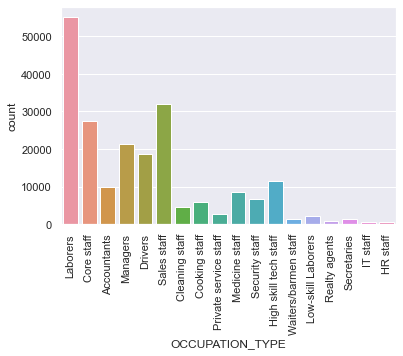

In [15]:
# Plotting Loan['OCCUPATION_TYPE'] 
sns.countplot(x= 'OCCUPATION_TYPE', data = Loan)
plt.xticks(rotation=90)
plt.show()

Insight : As we can observe that this column has 31% of  missing values. Since it is a categorical column, we can only replace it with mode value. But, replacing all of these 31% missing values with "Laborers" class will make dataset biased. So, we will leave it as it is and will not do any missing value treatment here.

# 2. EXT_SOURCE_3

In [16]:
Loan['EXT_SOURCE_3'].head(10)

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9         NaN
Name: EXT_SOURCE_3, dtype: float64

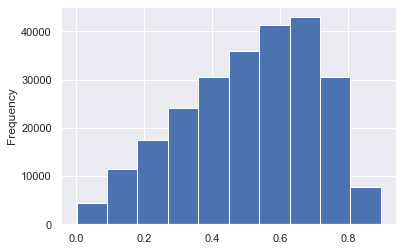

In [17]:
# Plotting the distribution
Loan['EXT_SOURCE_3'].plot.hist()
plt.show()

In [18]:
Loan['EXT_SOURCE_3'].mean()

0.5108529061800121

In [19]:
Loan['EXT_SOURCE_3'].median()

0.5352762504724826

In [20]:
Loan['EXT_SOURCE_3'].mode()

0    0.7463
dtype: float64

Insight : According to mean and median the data is right skewed. so we are replacing the null values with mode for the given column.

In [21]:
Loan['EXT_SOURCE_3'].fillna(Loan['EXT_SOURCE_3'].mode()[0], inplace=True)

In [22]:
Loan['EXT_SOURCE_3'].head(10)

0    0.139376
1    0.746300
2    0.729567
3    0.746300
4    0.746300
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9    0.746300
Name: EXT_SOURCE_3, dtype: float64

In [23]:
Loan['EXT_SOURCE_3'].isna().sum()

0

# 3. AMT_REQ_CREDIT_BUREAU_QRT

In [24]:
Loan['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

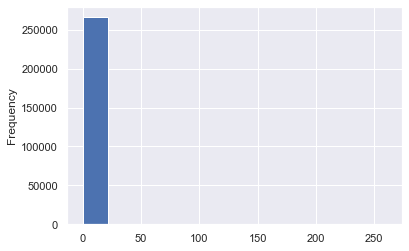

In [25]:
# Drawing hist plot for AMT_REQ_CREDIT_BUREAU_QRT
num_unique_values =  len(Loan.AMT_REQ_CREDIT_BUREAU_QRT.unique())
Loan['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins = num_unique_values)
plt.show()

In [26]:
Loan.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [27]:
Loan['AMT_REQ_CREDIT_BUREAU_QRT'].mean()

0.26547414959848414

In [28]:
Loan['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
dtype: float64

Insight : Since the column only takes discrete values, 1 or 0, so we cannot replace it by mean value. Here, we will replace it by mode.



In [29]:
Loan['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(Loan['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace= True)

In [30]:
Loan['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

# 4. AMT_REQ_CREDIT_BUREAU_YEAR

In [31]:
Loan['AMT_REQ_CREDIT_BUREAU_YEAR'].head(10)

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
5    1.0
6    2.0
7    0.0
8    1.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

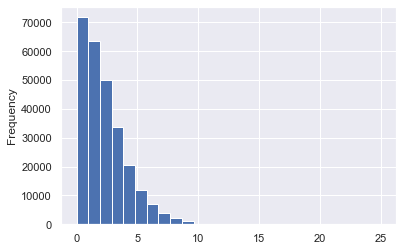

In [32]:
num_unique_values =  len(Loan.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
Loan['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins = num_unique_values)
plt.show()

Insight : As we observe that the values are only integers so we will replace by mode value and not mean value because median value will give an decimal value.

In [33]:
Loan['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [34]:
Loan['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
dtype: float64

In [35]:
Loan['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(Loan['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace= True)

In [36]:
Loan['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

# 5. AMT_REQ_CREDIT_BUREAU_WEEK

In [37]:
Loan['AMT_REQ_CREDIT_BUREAU_WEEK'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

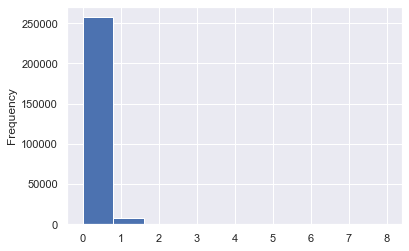

In [38]:
num_unique_values =  len(Loan.AMT_REQ_CREDIT_BUREAU_WEEK.unique())
Loan['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins = num_unique_values)
plt.show()

Insight : As we see, mostly the values are 0's. So, this column is mostly acting as a constant and has no variation. 

# 6. AMT_REQ_CREDIT_BUREAU_MON

In [39]:
Loan['AMT_REQ_CREDIT_BUREAU_MON'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

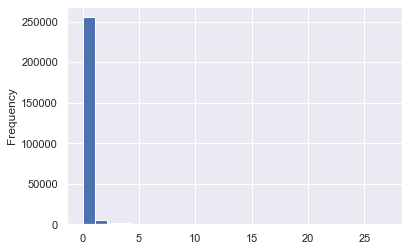

In [40]:
num_unique_values =  len(Loan.AMT_REQ_CREDIT_BUREAU_MON.unique())
Loan['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins = num_unique_values)
plt.show()

Insight : Again the same observation that mostly the values are 0's. So, this column is mostly acting as a constant and has no variation. So, we can ignore this column.

# 7. AMT_REQ_CREDIT_BUREAU_DAY

In [41]:
Loan['AMT_REQ_CREDIT_BUREAU_DAY'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

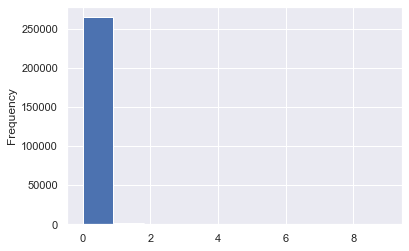

In [42]:
num_unique_values =  len(Loan.AMT_REQ_CREDIT_BUREAU_DAY.unique())
Loan['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins = num_unique_values)
plt.show()

In [43]:
Loan.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

Insight : As you can see, all the values are 0's. So, we can ignore this column.

# 8. AMT_REQ_CREDIT_BUREAU_HOUR

In [44]:
Loan['AMT_REQ_CREDIT_BUREAU_HOUR'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

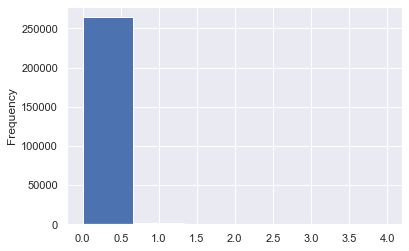

In [45]:
num_unique_values =  len(Loan.AMT_REQ_CREDIT_BUREAU_HOUR.unique())
Loan['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins = num_unique_values)
plt.show()

In [46]:
Loan.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

Insight : Again, there are many values with 0's , we can ignore this column.

In [47]:
Loan_missing = Loan.count()/len(Loan)
Loan_missing = (1-Loan_missing)*100
Loan_missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
NAME_TYPE_SUITE                  0.420148
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
DAYS_LAST_PHONE_CHANGE           0.000325
FLAG_DOCUMENT_12                 0

# FLOORSMAX_AVG

Verifying other columns having null values and treating them

In [48]:
Loan['FLOORSMAX_AVG'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

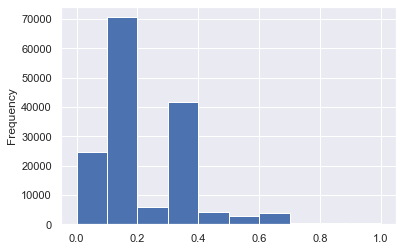

In [49]:
Loan['FLOORSMAX_AVG'].plot.hist()
plt.show()

In [50]:
Loan['FLOORSMAX_AVG'].mean()

0.2262819070368362

In [51]:
Loan['FLOORSMAX_AVG'].median()

0.1667

In [52]:
Loan['FLOORSMAX_AVG'].mode()

0    0.1667
dtype: float64

In [53]:
Loan['FLOORSMAX_AVG'].fillna(Loan['FLOORSMAX_AVG'].median(), inplace= True)

In [54]:
Loan['FLOORSMAX_AVG'].isna().sum()

0

# FLOORSMAX_MEDI 

In [55]:
Loan['FLOORSMAX_MEDI'].head(5)

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MEDI, dtype: float64

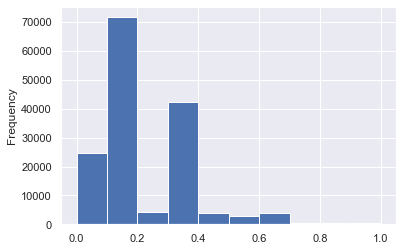

In [56]:
Loan['FLOORSMAX_MEDI'].plot.hist()
plt.show()

In [57]:
Loan['FLOORSMAX_MEDI'].mean()

0.22589659009280993

In [58]:
Loan['FLOORSMAX_MEDI'].median()

0.1667

In [59]:
Loan['FLOORSMAX_MEDI'].fillna(Loan['FLOORSMAX_MEDI'].median(), inplace= True)

In [60]:
Loan['FLOORSMAX_MEDI'].isna().sum()

0

# FLOORSMAX_MODE

In [61]:
Loan['FLOORSMAX_MODE'].head(5)

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MODE, dtype: float64

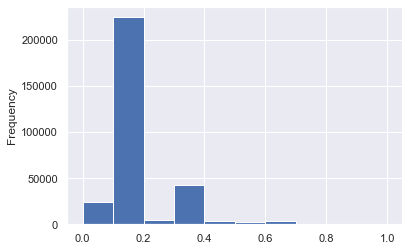

In [62]:
Loan['FLOORSMAX_MEDI'].plot.hist()
plt.show()

In [63]:
Loan['FLOORSMAX_MEDI'].mean()

0.19643988052528838

In [64]:
Loan['FLOORSMAX_MEDI'].median()

0.1667

In [65]:
Loan['FLOORSMAX_MEDI'].fillna(Loan['FLOORSMAX_MEDI'].median(), inplace= True)

In [66]:
Loan['FLOORSMAX_MEDI'].isna().sum()

0

# YEARS_BEGINEXPLUATATION_MEDI  


In [67]:
Loan['YEARS_BEGINEXPLUATATION_MEDI'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

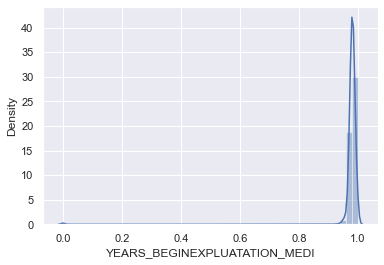

In [68]:
sns.distplot(Loan['YEARS_BEGINEXPLUATATION_MEDI'])
plt.show()

In [69]:
Loan['YEARS_BEGINEXPLUATATION_MODE'].mean()

0.9770653729428284

In [70]:
Loan['YEARS_BEGINEXPLUATATION_MODE'].median()

0.9816

In [71]:
Loan['YEARS_BEGINEXPLUATATION_MODE'].fillna(Loan['YEARS_BEGINEXPLUATATION_MODE'].mean(), inplace= True)

In [72]:
Loan['YEARS_BEGINEXPLUATATION_MODE'].isna().sum()

0

# YEARS_BEGINEXPLUATATION_MODE

In [73]:
Loan['YEARS_BEGINEXPLUATATION_MODE'].head()

0    0.972200
1    0.985100
2    0.977065
3    0.977065
4    0.977065
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [74]:
Loan['YEARS_BEGINEXPLUATATION_MODE'].mean()

0.977065372942287

In [75]:
Loan['YEARS_BEGINEXPLUATATION_MODE'].median()

0.9770653729428284

In [76]:
Loan['YEARS_BEGINEXPLUATATION_MODE'].mode()

0    0.977065
dtype: float64

In [77]:
Loan['YEARS_BEGINEXPLUATATION_MODE'].fillna(Loan['YEARS_BEGINEXPLUATATION_MODE'].mean(), inplace= True)

In [78]:
Loan['YEARS_BEGINEXPLUATATION_MODE'].isna().sum()

0

# TOTALAREA_MODE

In [79]:
Loan['TOTALAREA_MODE'].head()

0    0.0149
1    0.0714
2       NaN
3       NaN
4       NaN
Name: TOTALAREA_MODE, dtype: float64

In [80]:
Loan['TOTALAREA_MODE'].median()

0.0688

In [81]:
Loan['TOTALAREA_MODE'].mean()

0.10254666268544003

In [82]:
Loan['TOTALAREA_MODE'].fillna(Loan['TOTALAREA_MODE'].median(), inplace= True)

In [83]:
Loan['TOTALAREA_MODE'].isna().sum()

0

# EMERGENCYSTATE_MODE

In [84]:
Loan['EMERGENCYSTATE_MODE'].head()

0     No
1     No
2    NaN
3    NaN
4    NaN
Name: EMERGENCYSTATE_MODE, dtype: object

In [85]:
Loan['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

Insight :
This column has 47 percent data with NA , if we are replacing with mode .Then Data become biased so we are not treating this data with mode and will remain as NAN

# NAME_TYPE_SUITE 

In [86]:
Loan['NAME_TYPE_SUITE'].head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [87]:
Loan['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

In [88]:
Loan['NAME_TYPE_SUITE'].fillna(Loan['NAME_TYPE_SUITE'].mode()[0], inplace= True)

In [89]:
Loan['NAME_TYPE_SUITE'].isna().sum()

0

# OBS_30_CNT_SOCIAL_CIRCLE

In [90]:
Loan['OBS_30_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [91]:
Loan['OBS_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
dtype: float64

In [92]:
Loan['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(Loan['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace= True)

In [93]:
Loan['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

# DEF_30_CNT_SOCIAL_CIRCLE

In [94]:
Loan['DEF_30_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [95]:
Loan['DEF_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
dtype: float64

In [96]:
Loan['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(Loan['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace= True)

In [97]:
Loan['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

# OBS_60_CNT_SOCIAL_CIRCLE

In [98]:
Loan['OBS_60_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [99]:
Loan['OBS_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
dtype: float64

In [100]:
Loan['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(Loan['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace= True)

In [101]:
Loan['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

# DEF_60_CNT_SOCIAL_CIRCLE

In [102]:
Loan['DEF_60_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [103]:
Loan['DEF_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
dtype: float64

In [104]:
Loan['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(Loan['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace= True)

In [105]:
Loan['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

In [106]:
Loan_missing = Loan.count()/len(Loan)
Loan_missing = (1-Loan_missing)*100
Loan_missing.sort_values(ascending=False).head(15)

FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
DAYS_LAST_PHONE_CHANGE           0.000325
YEARS_BEGINEXPLUATATION_MODE     0.000000
dtype: float64

# EXT_SOURCE_2

In [107]:
Loan['EXT_SOURCE_2'].head()

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64

In [108]:
Loan['EXT_SOURCE_2'].mean()


0.5143926741308463

In [109]:
Loan['EXT_SOURCE_2'].median()

0.5659614260608526

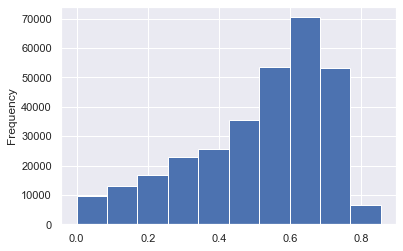

In [110]:
Loan['EXT_SOURCE_2'].plot.hist()
plt.show()

In [111]:
Loan['EXT_SOURCE_2'].fillna(Loan['EXT_SOURCE_2'].mode()[0], inplace= True)

In [112]:
Loan['EXT_SOURCE_2'].isna().sum()

0

# AMT_GOODS_PRICE

In [113]:
Loan['AMT_GOODS_PRICE'].head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [114]:
Loan['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [115]:
Loan['AMT_GOODS_PRICE'].median()

450000.0

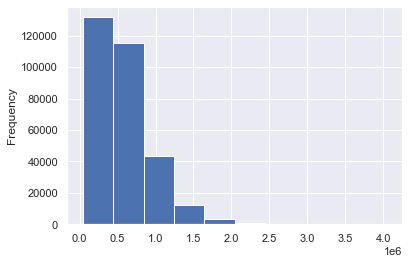

In [116]:
Loan['AMT_GOODS_PRICE'].plot.hist()
plt.show()

In [117]:
Loan['AMT_GOODS_PRICE'].fillna(Loan['AMT_GOODS_PRICE'].median(), inplace= True)

In [118]:
Loan['AMT_GOODS_PRICE'].isna().sum()

0

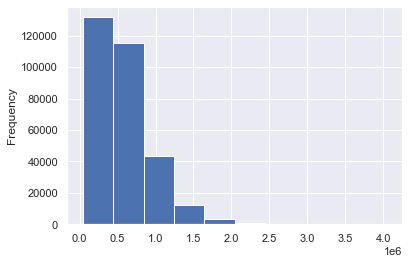

In [119]:
Loan['AMT_GOODS_PRICE'].plot.hist()
plt.show()

# AMT_ANNUITY

In [120]:
Loan['AMT_ANNUITY'].head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [121]:
Loan['AMT_ANNUITY'].mean()

27108.573909183444

In [122]:
Loan['AMT_ANNUITY'].median ()

24903.0

In [123]:
Loan['AMT_ANNUITY'].fillna(Loan['AMT_ANNUITY'].median(), inplace= True)

In [124]:
Loan['AMT_ANNUITY'].isna().sum()

0

# CNT_FAM_MEMBERS

In [125]:
Loan['CNT_FAM_MEMBERS'].head()

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [126]:
Loan['CNT_FAM_MEMBERS'].mode()


0    2.0
dtype: float64

In [127]:
Loan['CNT_FAM_MEMBERS'].fillna(Loan['CNT_FAM_MEMBERS'].mode()[0], inplace= True)

In [128]:
Loan['CNT_FAM_MEMBERS'].isna().sum()

0

# DAYS_LAST_PHONE_CHANGE

In [129]:
Loan['DAYS_LAST_PHONE_CHANGE'].head()

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [130]:
Loan['DAYS_LAST_PHONE_CHANGE']=Loan['DAYS_LAST_PHONE_CHANGE'].abs()

In [131]:
Loan['DAYS_LAST_PHONE_CHANGE'].abs()

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [132]:
Loan['DAYS_LAST_PHONE_CHANGE'] = round(Loan['DAYS_LAST_PHONE_CHANGE']/365, 0)

In [133]:
Loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                      0.972200          0.0833                        0.9722          0.0833          0.0149                  No                       2.0                       2.0                       2.0                       2.0                     3.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.746300               

# DAYS_BIRTH

This column has represents the clients birth in number of days relative to the application. So, we are converting into year for conciseness and better understanding. As the days are given as negative values, we have used -round() to convert it into positive values. We will do the same transformation for other dates.

In [134]:
Loan['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [135]:
Loan['DAYS_BIRTH'] = abs(round(Loan['DAYS_BIRTH']/365, 0))
Loan['DAYS_BIRTH'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64


DAYS_EMPLOYED

In [136]:
Loan['DAYS_EMPLOYED'] = abs(round(Loan['DAYS_EMPLOYED']/365, 0))
Loan['DAYS_EMPLOYED'].head()

0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: DAYS_EMPLOYED, dtype: float64

In [137]:
Loan['DAYS_REGISTRATION'] = -round(Loan['DAYS_REGISTRATION']/365, 0)
Loan['DAYS_REGISTRATION'].head()

0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [138]:
Loan['DAYS_ID_PUBLISH'] = -round(Loan['DAYS_ID_PUBLISH']/365, 0)
Loan['DAYS_ID_PUBLISH'].head()

0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [139]:
Loan.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


# Target

### Total users

In [140]:
Loan['TARGET'].count()

307511

### Client with payment difficulties

In [141]:
(Loan['TARGET']==1).sum()

24825

### Other clients

In [142]:
(Loan['TARGET']==0).sum()

282686

### Ratio

Insight :  Data imbalance is high

In [143]:
(Loan['TARGET']==0).sum()/(Loan['TARGET']==1).sum()

11.387150050352467

# Starting analysis of numerical and categorical data. Starting with categorical data.

### Analysing categorical data 

Due to data imbalance, we will separate out the Loan dataframe with a target equal to 0 and target equal to 1. And we will analyse them individually and try to find any relationship if it exists.

In [144]:
Loan_0 = Loan.loc[Loan['TARGET'] == 0]
Loan_1 = Loan.loc[Loan['TARGET'] == 1]

In [145]:
def label_target (row):
    if row['TARGET'] == 0 :
        return "May Not Default"
    else:
        return "May Default"

Loan['TARGET_LABEL'] = Loan.apply(lambda row: label_target, axis=1)


In [146]:
Loan.loc[Loan['TARGET'] == 0, ['TARGET_LABEL']] = 'May Not Default'
Loan.loc[Loan['TARGET'] == 1, ['TARGET_LABEL']] = 'May Default'


In [147]:
Loan['TARGET_LABEL']

0             May Default
1         May Not Default
2         May Not Default
3         May Not Default
4         May Not Default
               ...       
307506    May Not Default
307507    May Not Default
307508    May Not Default
307509        May Default
307510    May Not Default
Name: TARGET_LABEL, Length: 307511, dtype: object

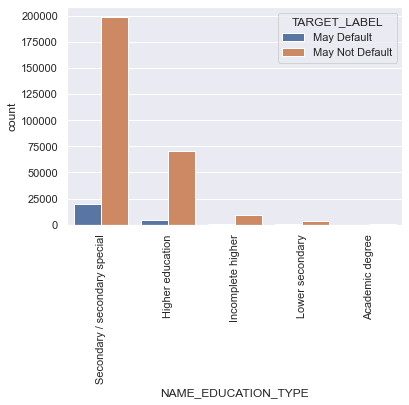

In [148]:
chart = sns.countplot(x= 'NAME_EDUCATION_TYPE', hue = 'TARGET_LABEL', data = Loan)
original_label = ['0', '1']
custom_label = ['May Not Default', 'May Default']

legend = chart.axes.get_legend()

plt.xticks(rotation=90)
plt.show()

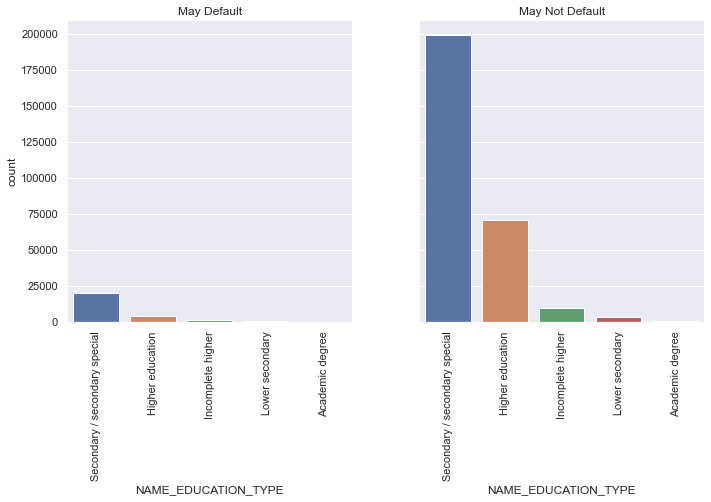

In [149]:
graph = sns.catplot(x="NAME_EDUCATION_TYPE",col="TARGET_LABEL", 
                data=Loan, kind="count");

graph.set_xticklabels(rotation=90)

graph.set_titles("{col_name}")
plt.show()

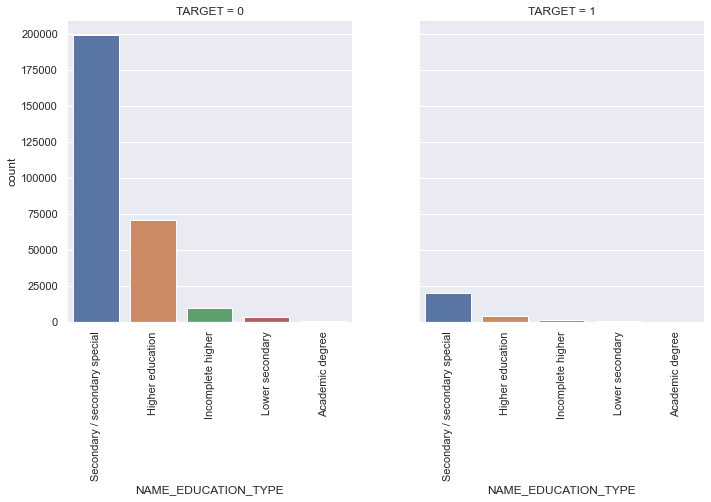

In [150]:
chart = sns.catplot(x="NAME_EDUCATION_TYPE",col="TARGET", 
                data=Loan, kind="count");

chart.set_xticklabels(rotation=90)



### INSIGHTS FROM ABOVE 3 GRAPHS on 'NAME_EDUCATION_TYPE'
 Loan Application from Customer with Secondary education have higher chance that they will not defalult followed by higher education.here we can infer that Academic degree has less defaults.


In [151]:
Loan_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    282686 non-null  int64  
 1   TARGET                        282686 non-null  int64  
 2   NAME_CONTRACT_TYPE            282686 non-null  object 
 3   CODE_GENDER                   282686 non-null  object 
 4   FLAG_OWN_CAR                  282686 non-null  object 
 5   FLAG_OWN_REALTY               282686 non-null  object 
 6   CNT_CHILDREN                  282686 non-null  int64  
 7   AMT_INCOME_TOTAL              282686 non-null  float64
 8   AMT_CREDIT                    282686 non-null  float64
 9   AMT_ANNUITY                   282686 non-null  float64
 10  AMT_GOODS_PRICE               282686 non-null  float64
 11  NAME_TYPE_SUITE               282686 non-null  object 
 12  NAME_INCOME_TYPE              282686 non-nul

In [152]:
Loan_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    24825 non-null  int64  
 1   TARGET                        24825 non-null  int64  
 2   NAME_CONTRACT_TYPE            24825 non-null  object 
 3   CODE_GENDER                   24825 non-null  object 
 4   FLAG_OWN_CAR                  24825 non-null  object 
 5   FLAG_OWN_REALTY               24825 non-null  object 
 6   CNT_CHILDREN                  24825 non-null  int64  
 7   AMT_INCOME_TOTAL              24825 non-null  float64
 8   AMT_CREDIT                    24825 non-null  float64
 9   AMT_ANNUITY                   24825 non-null  float64
 10  AMT_GOODS_PRICE               24825 non-null  float64
 11  NAME_TYPE_SUITE               24825 non-null  object 
 12  NAME_INCOME_TYPE              24825 non-null  object 
 13  

In [153]:
Loan.columns  # all cols

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
     

In [154]:
Loan.describe().columns  # numerical cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
  

In [155]:
set(Loan.columns) - set(Loan.describe().columns)

{'CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'TARGET_LABEL',
 'WEEKDAY_APPR_PROCESS_START'}

In [156]:
cat_col=Loan.select_dtypes(include=['object']).columns# Categorical column 
cat_col


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE', 'TARGET_LABEL'], dtype='object')

In [157]:
# Numerical cols

num_col = Loan.select_dtypes(include=['int64','float64']).columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
  

In [158]:
# plotting(Loan, Loan_0,Loan_1,column)
def plotting(Loan,Loan_0,Loan_1,column):
    
    train = Loan
    train_0 = Loan_0
    train_1 = Loan_1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() 

    plt.show()
      

# Univariate Analysis of Categorical cols

Plotting NAME_CONTRACT_TYPE


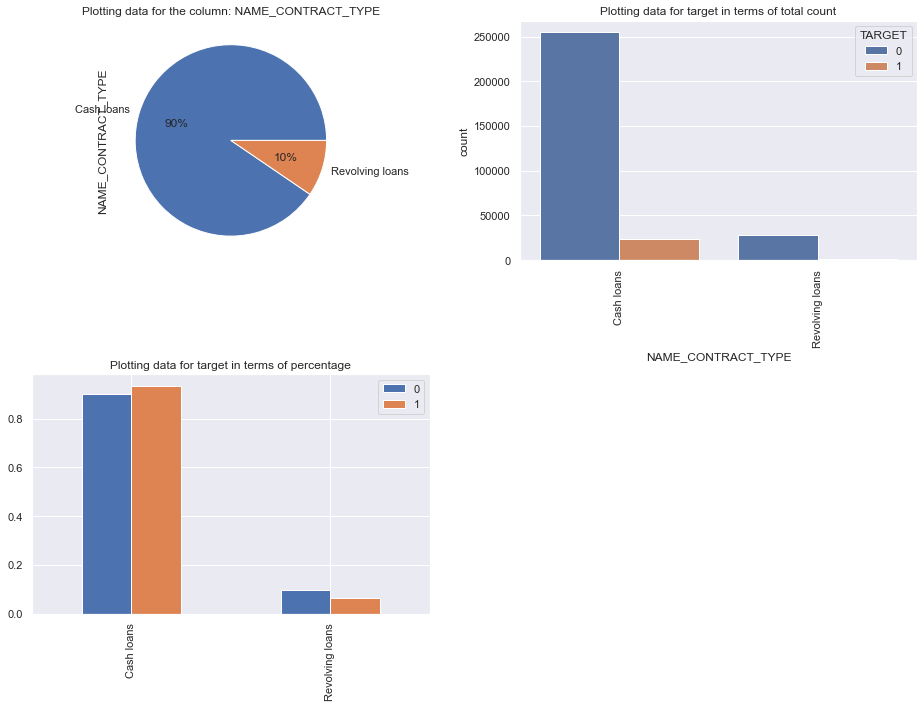



Plotting CODE_GENDER


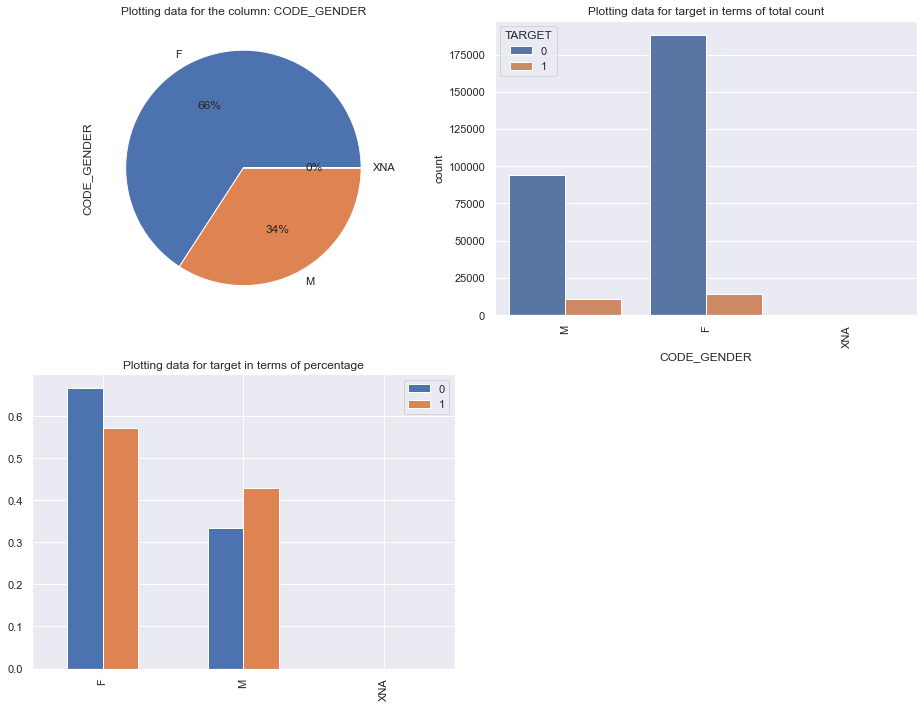



Plotting FLAG_OWN_CAR


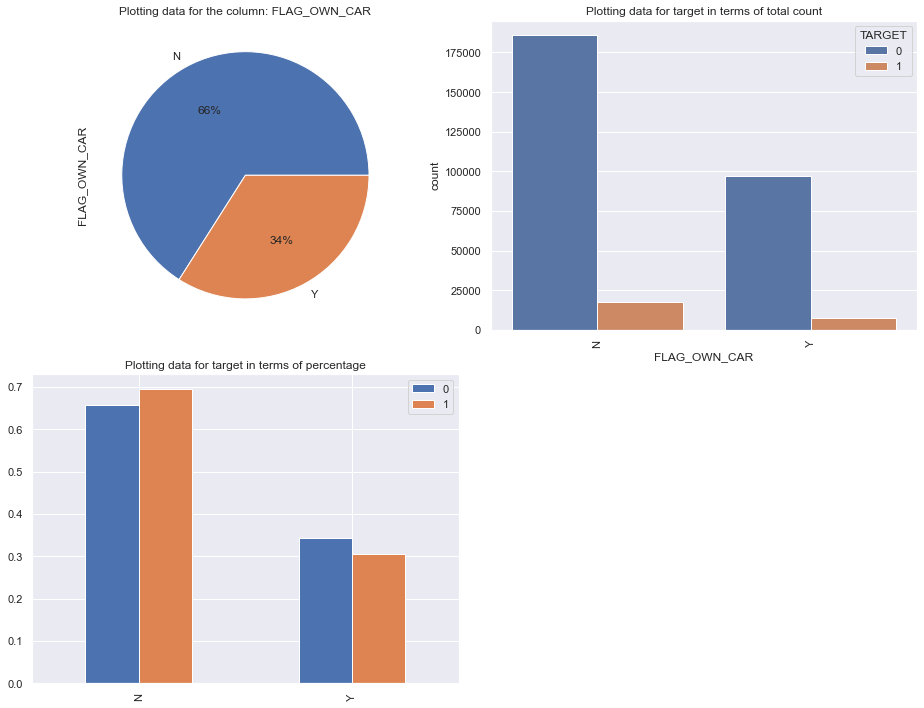



Plotting FLAG_OWN_REALTY


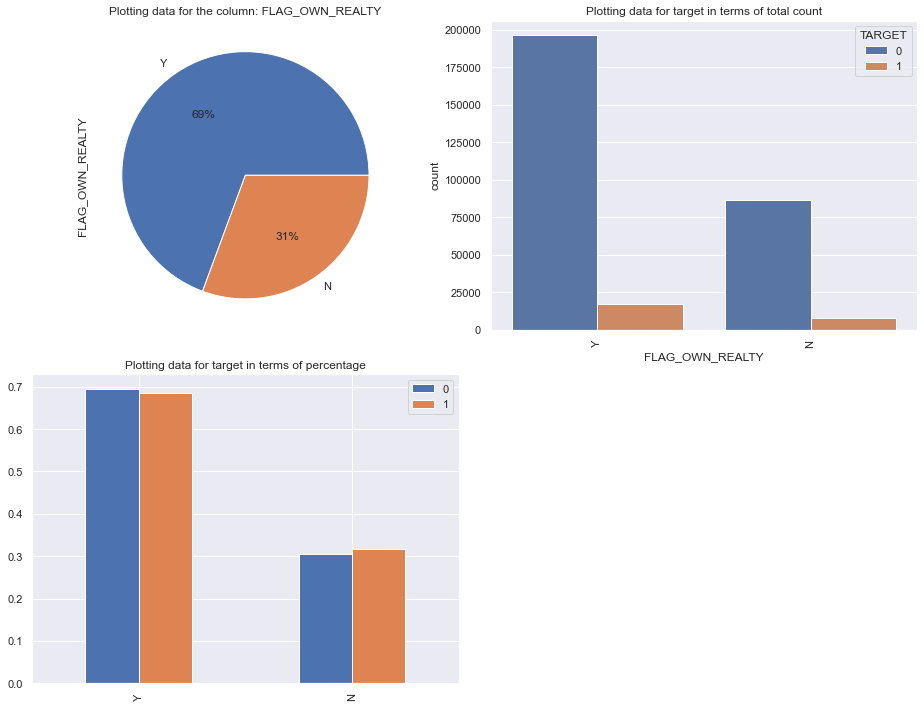



Plotting NAME_TYPE_SUITE


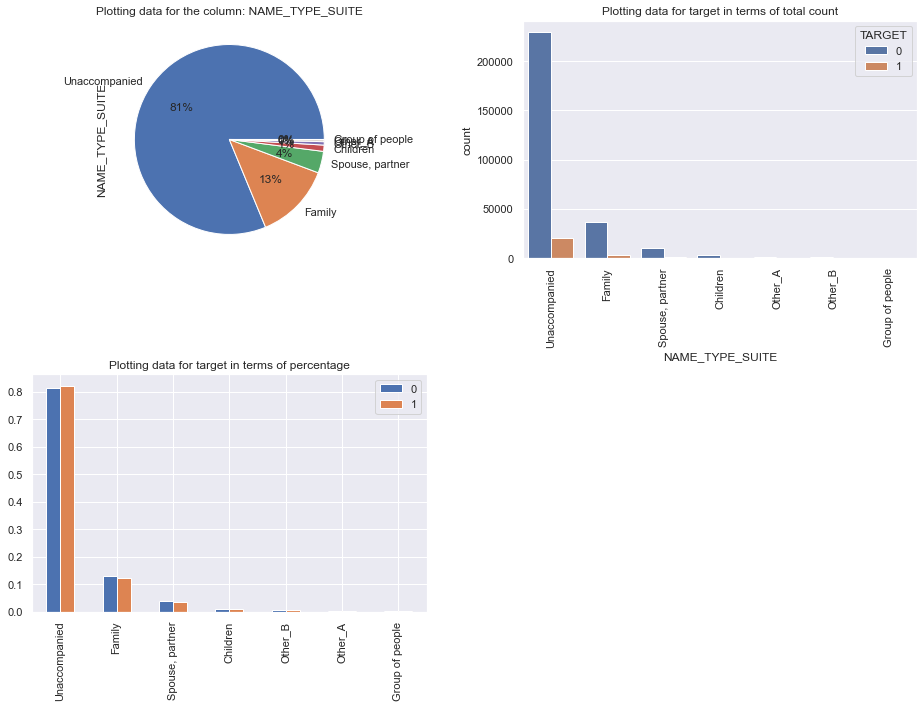



Plotting NAME_INCOME_TYPE


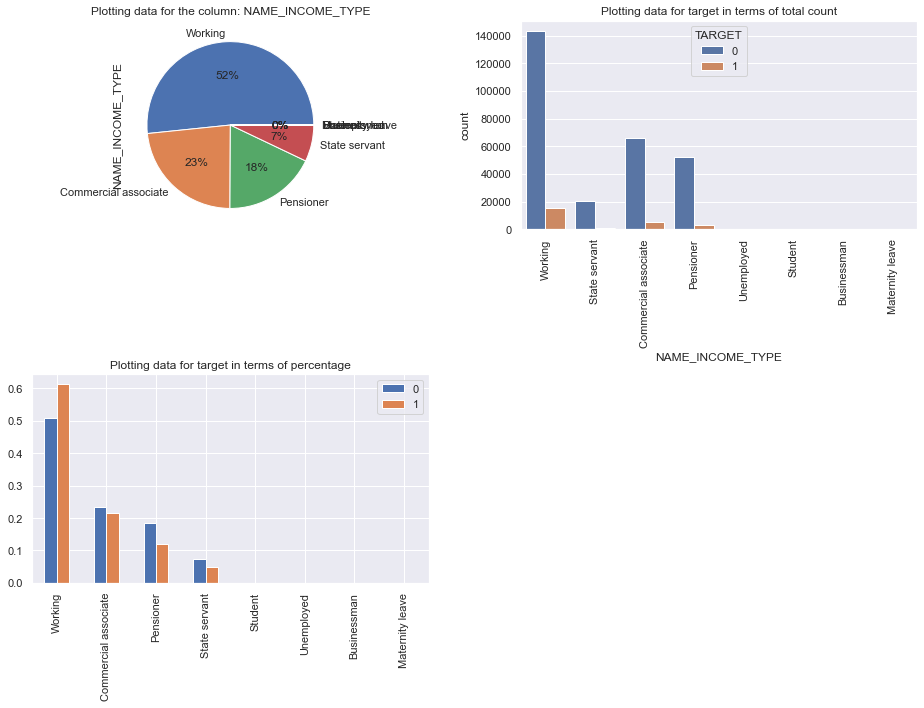



Plotting NAME_EDUCATION_TYPE


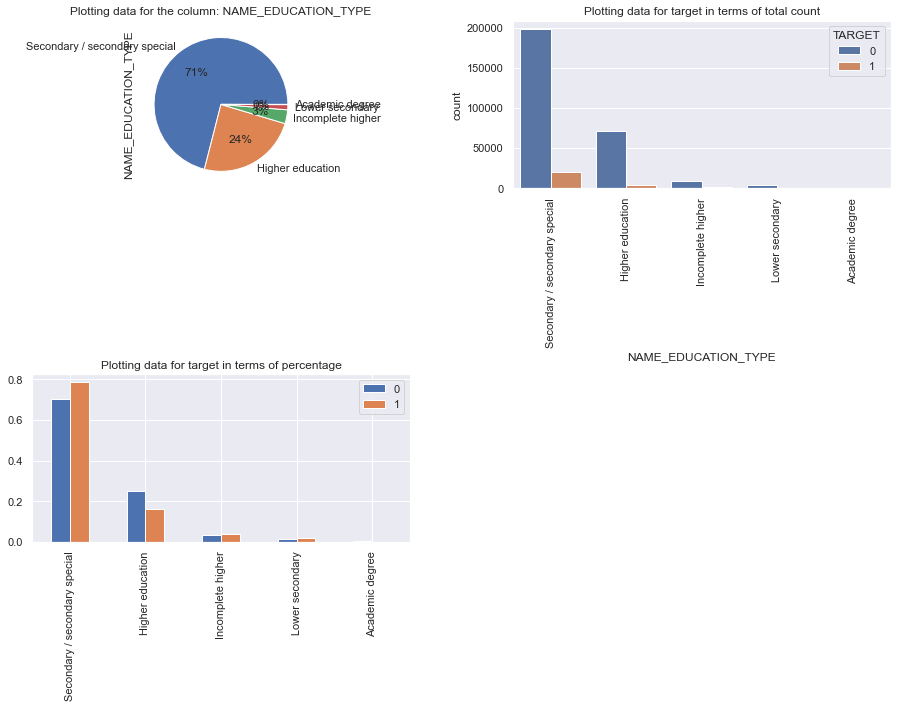



Plotting NAME_FAMILY_STATUS


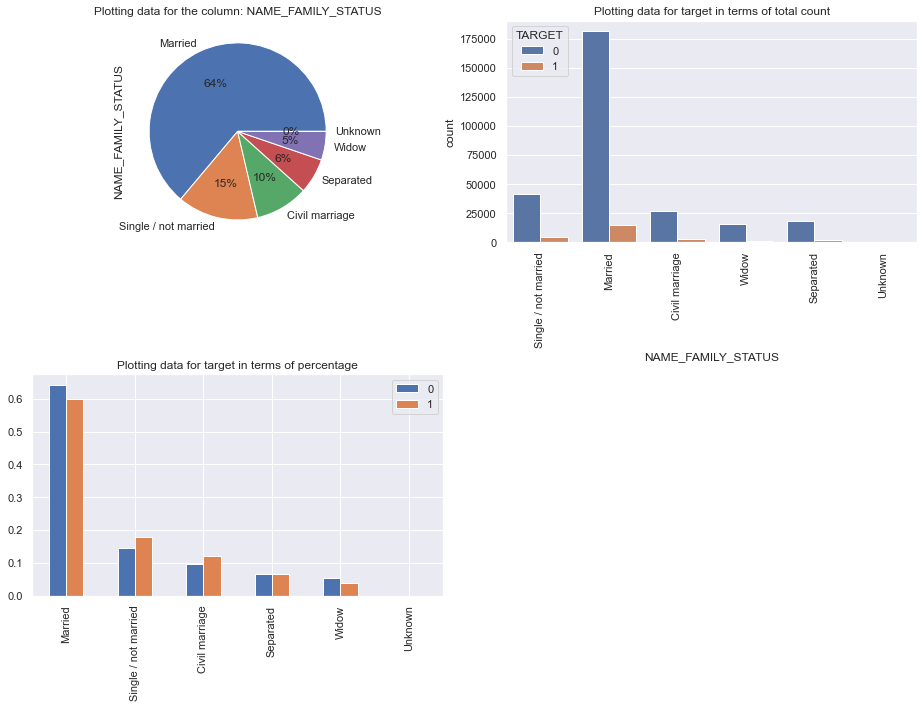



Plotting NAME_HOUSING_TYPE


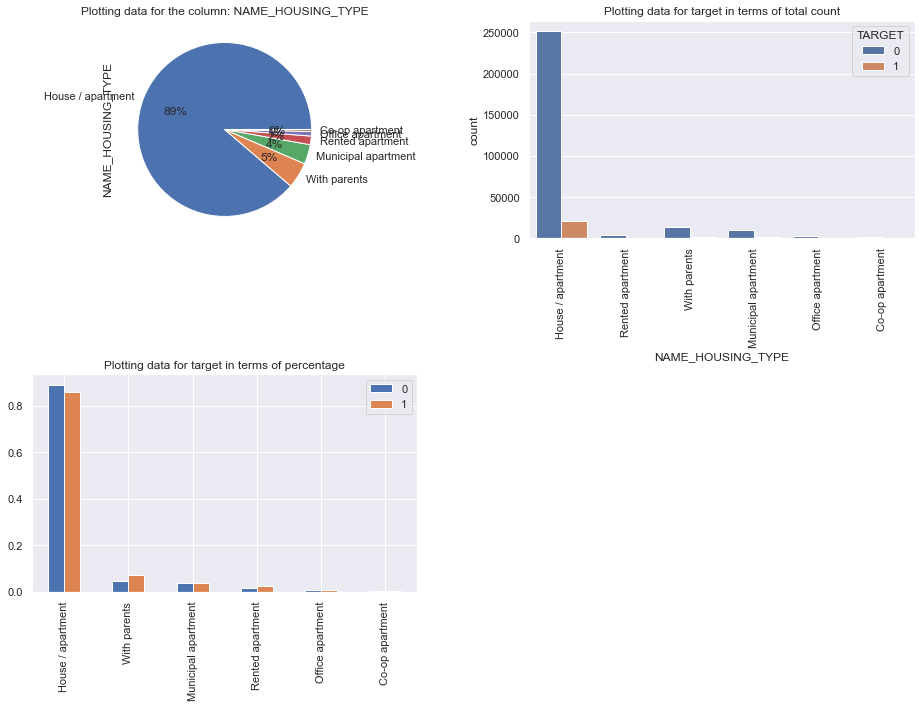



Plotting OCCUPATION_TYPE


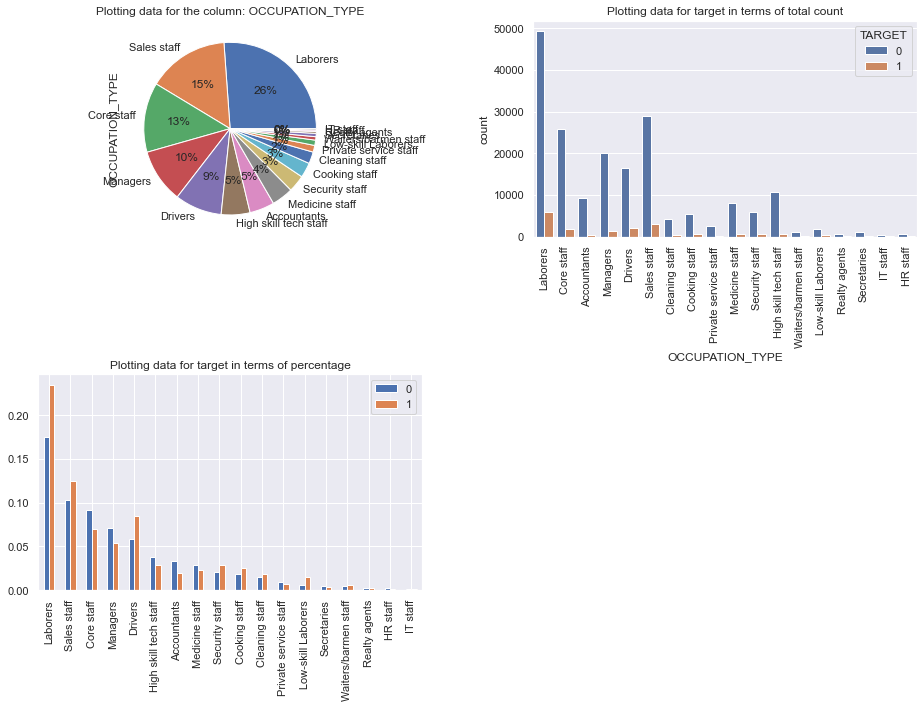



Plotting WEEKDAY_APPR_PROCESS_START


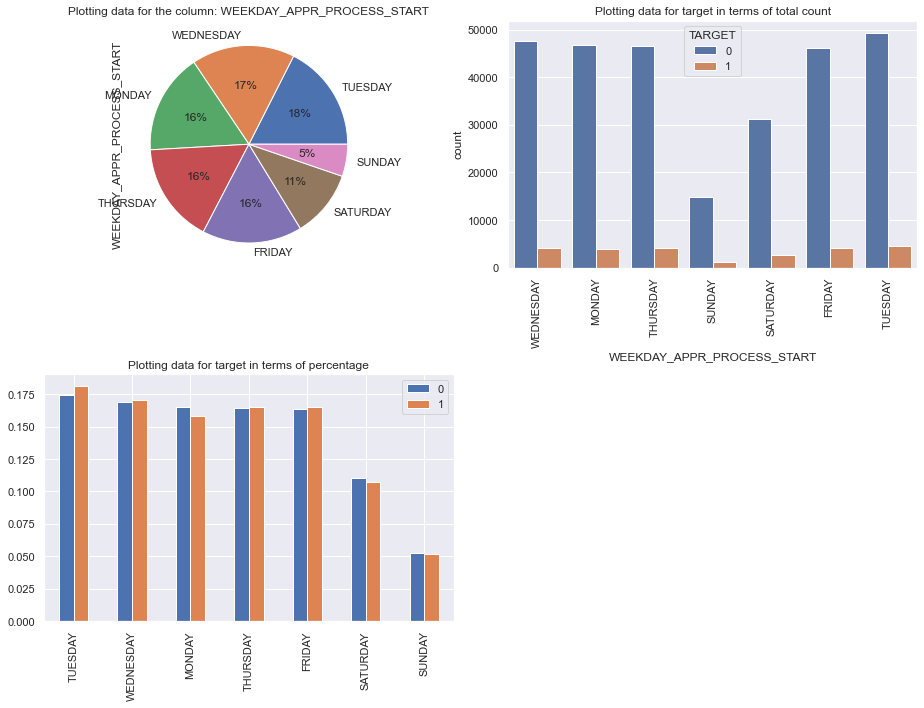



Plotting ORGANIZATION_TYPE


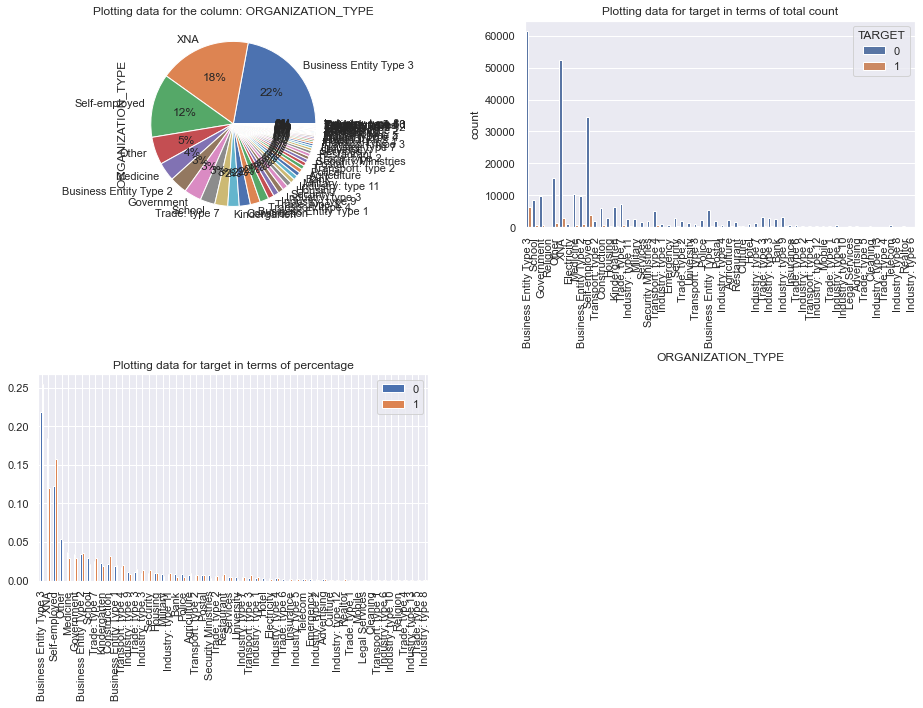



Plotting EMERGENCYSTATE_MODE


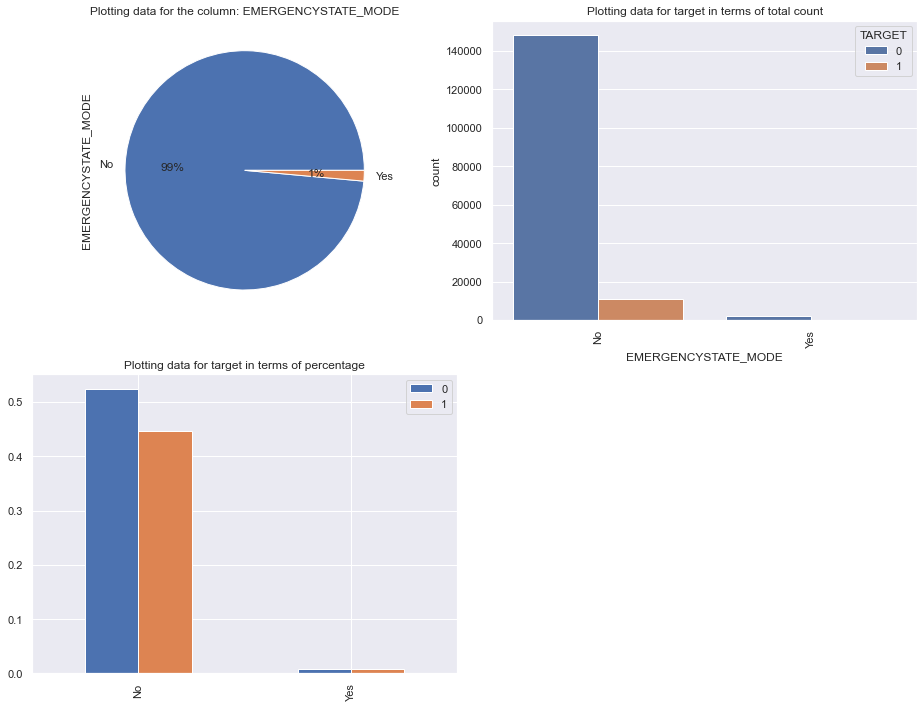



Plotting TARGET_LABEL


KeyError: 'TARGET_LABEL'

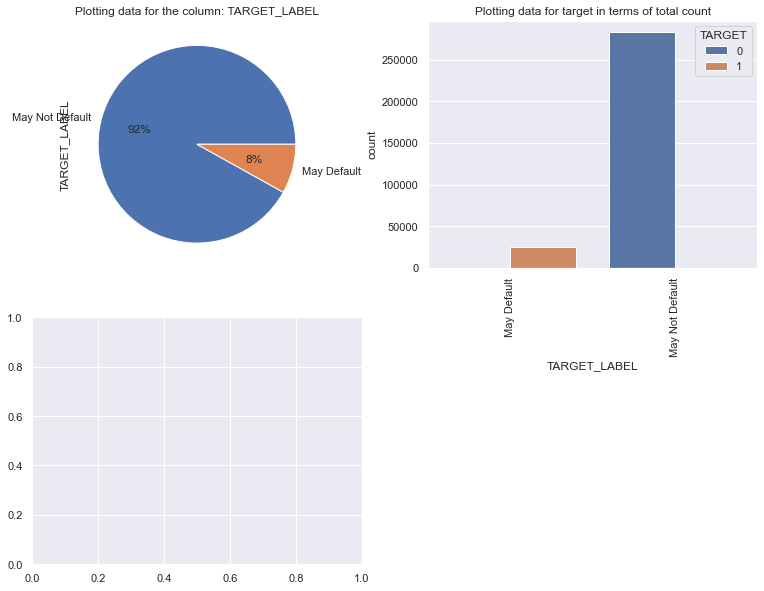

In [159]:
for column in cat_col:
    print("Plotting "+ column)
    plotting(Loan,Loan_0,Loan_1,column)
    print("\n=================================================================\n")

### INSIGHTS :

NAME_CONTRACT_TYPE:Customer with payment difficulty prefer cash loans higher than customer without payment difficulty.Customer
without payment difficulty prefer revolving loans also .Revolving loans are just a small fraction from the total number of loans

CODE_GENDER: Less number of males take loan but the defaulters are higher in case of males.Therefore males have a higher chance of not returning their loans.

FLAG_OWN_REALTY:The defaulting rate of both categories are approx same. Thus we can infer that there is no correlation between owning a reality and defaulting the loan

NAME_HOUSING_TYPE:Majority of people live in House/apartment
People living in office apartments have lowest default rate
People living with parents and living in rented apartments have higher chances of defaulting

NAME_INCOME_TYPE: Pensioner and state servant defaulter is lower.Working and Commercial associate have higher default rate
Student and Businessmen though less in numbers, do not have default record. Safest two categories for providing loan
Most of applicants for loans income type is Working, followed by Commercial associate, Pensioner and State servant.

NAME_EDUCATION_TYPE: Most client take loan for secondary education followed by higher education. But the defualt rate in 
secondary education is much high and for higher education is much low.

NAME_FAMILY_STATUS: Most married people apply for loan, and mostly they are not defaulters. Single and civil marriage have higher default rate.

OCCUPATION_TYPE: Laborers and different categories of staffs mostly taken the loan, but the managers and the high skilled tech staffs are most relaible.
Category with highest percent of defautess are Low-skill Laborers followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff
IT staff are less likely to apply for Loan.

ORGANIZATION_TYPE: Self employed people have relative high defaulting rate as compare with others.

# Univariate Analysis of Numerical columns

# NON -DEFAULTER

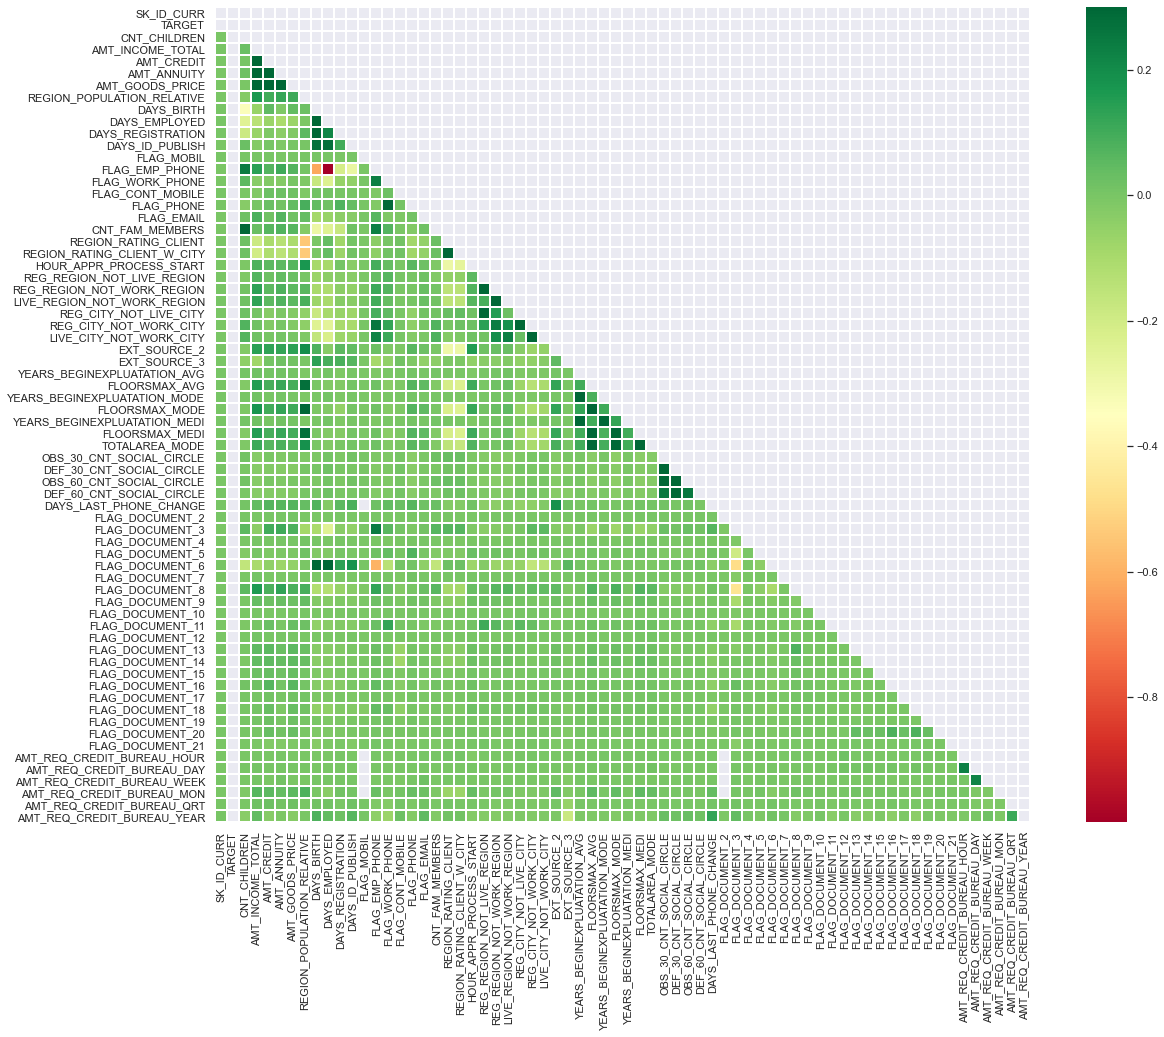

In [160]:
import numpy as np
corr = Loan_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 15))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3,cmap="RdYlGn", linewidth =1, square=True)

### Insights
1.Credit amount is highly correlated with:

Goods Price Amount

Loan Annuity

Total Income

2.We can also see that repayers have high correlation in number of days employed.

# Finding the top 10 correlation

In [161]:
correlation_0 = Loan_0.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]

(correlation_0).sort_values(ascending= False).head(20)

DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999756
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999756
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998510
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998510
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997253
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997253
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988153
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987022
AMT_GOODS_PRICE               AMT_CREDIT                      0.987022
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.985603
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985603
YEARS_

In [162]:
'''
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999758
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998510
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997253
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987022
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.985603
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971032                            
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.962064
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.950149
'''


'\nDAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999758\nOBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998510\nFLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997253\nYEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582\nFLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153\nAMT_CREDIT                    AMT_GOODS_PRICE                 0.987022\nFLOORSMAX_MODE                FLOORSMAX_AVG                   0.985603\nYEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971032                            \nYEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.962064\nREGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.950149\n'

# Defaulter

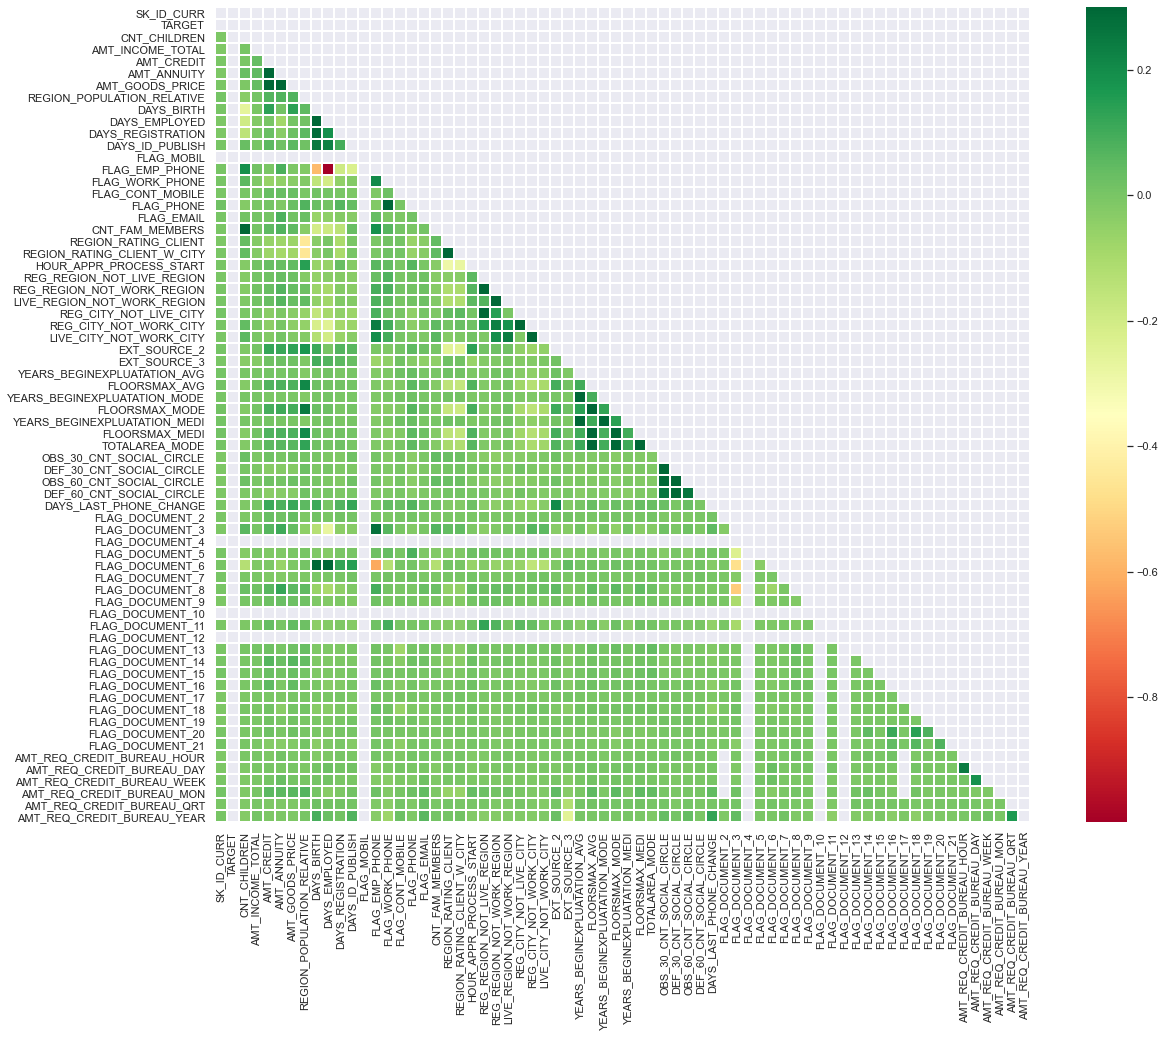

In [163]:
import numpy as np
corr = Loan_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 15))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3,cmap="RdYlGn", linewidth =1, square=True)

### Insights
Credit amount is highly correlated with good price amount which is same as repayers.

Loan annuity correlation with credit amount has slightly reduced in defaulters when compared to repayers

We can also see that repayers have high correlation in number of days employed when compared to defaulters.




# Finding the top 10 correlation

In [164]:
correlation_0 = Loan_1.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]

(correlation_0).sort_values(ascending= False).head(20)

DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999705
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999705
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998270
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998270
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997295
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997295
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996124
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996124
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989195
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986594
AMT_CREDIT                    AMT_GOODS_PRICE                 0.982783
AMT_GOODS_PRICE               AMT_CREDIT                      0.982783
YEARS_

In [165]:
'''
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999702
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998270
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997295
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996124
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986594
AMT_GOODS_PRICE               AMT_CREDIT                      0.982783
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978073
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.956637
'''

'\nDAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999702\nOBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998270\nFLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997295\nYEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996124\nFLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195\nFLOORSMAX_MODE                FLOORSMAX_AVG                   0.986594\nAMT_GOODS_PRICE               AMT_CREDIT                      0.982783\nYEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466\nYEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978073\nREGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.956637\n'

# Analysis for the outliers

Potting numerial column based on the index and analysing if there are any outliers in the column.

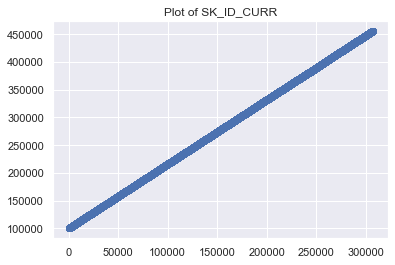

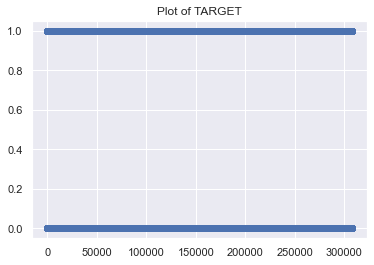

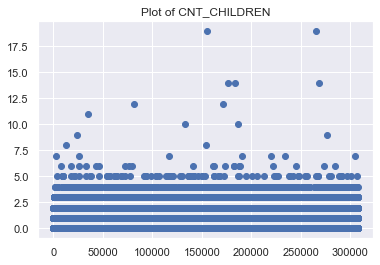

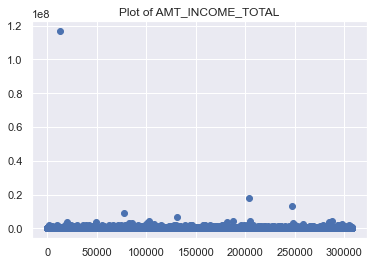

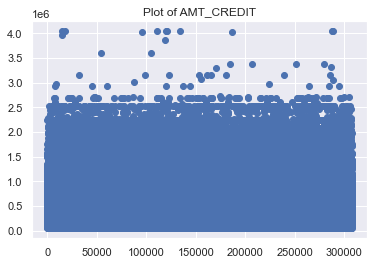

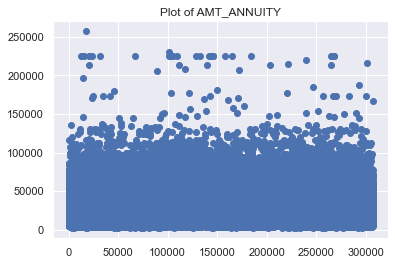

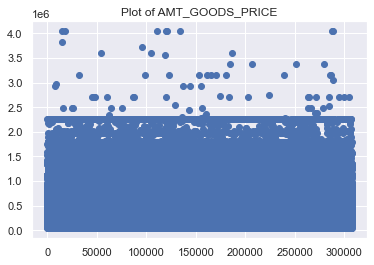

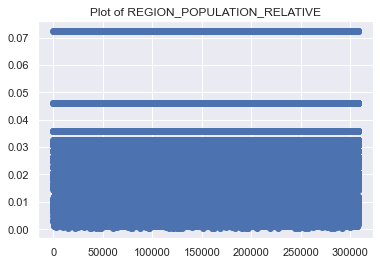

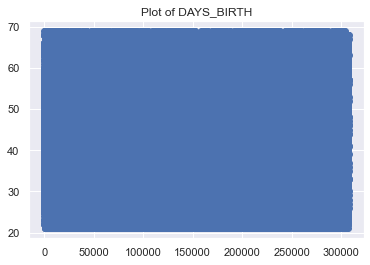

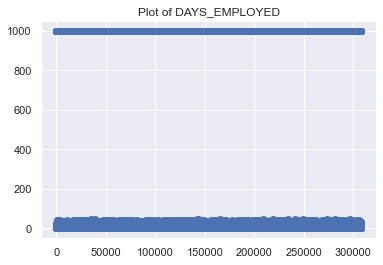

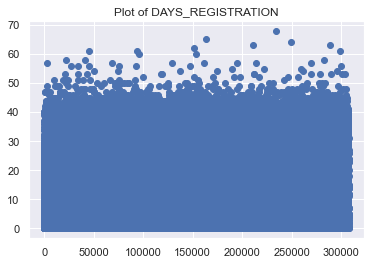

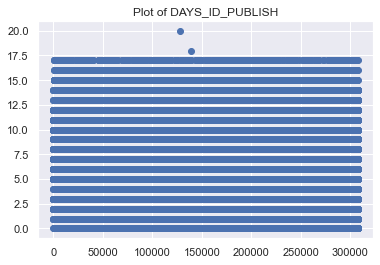

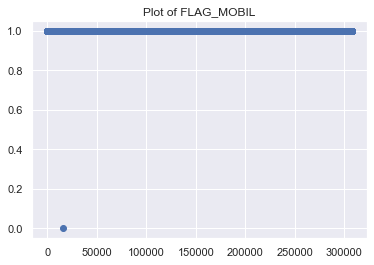

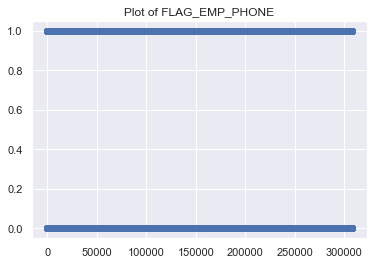

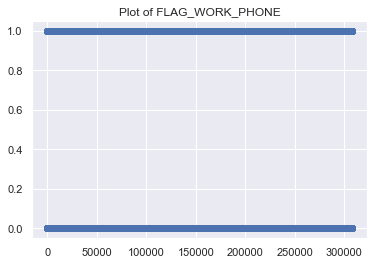

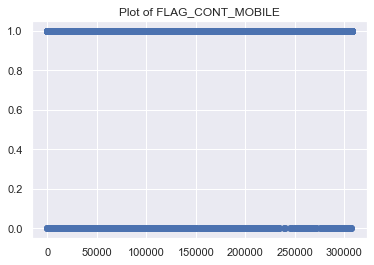

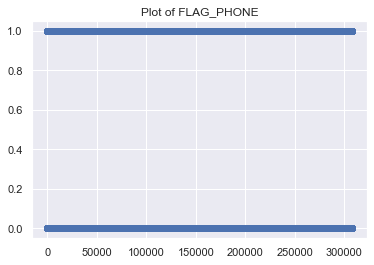

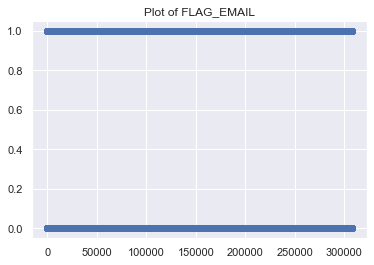

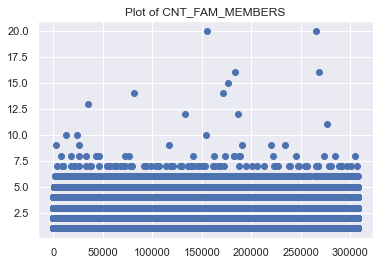

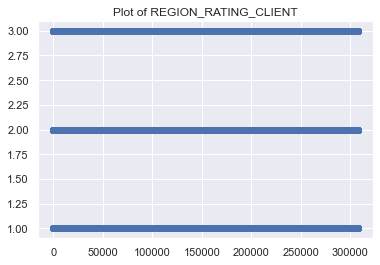

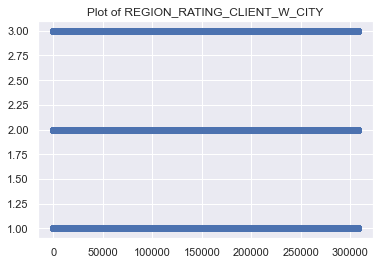

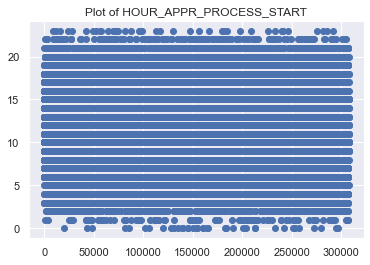

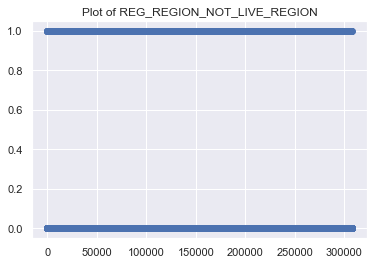

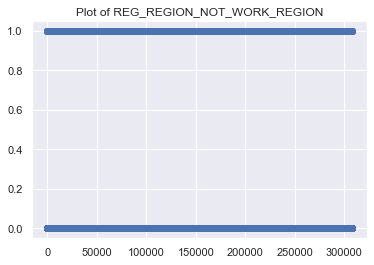

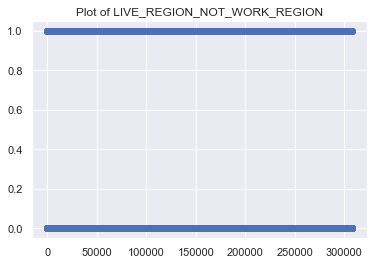

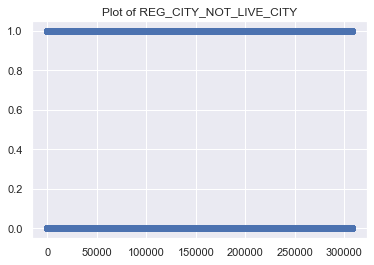

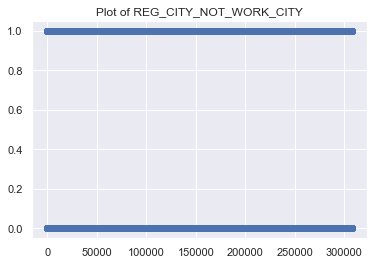

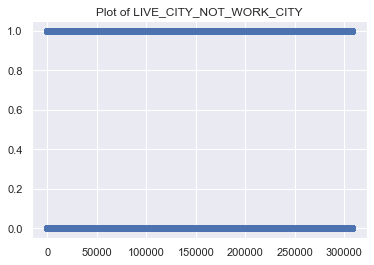

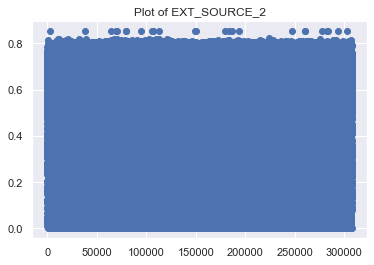

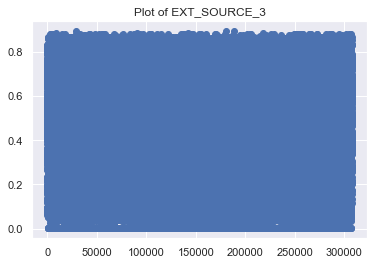

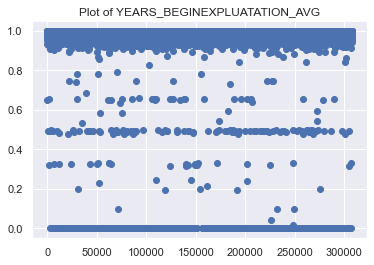

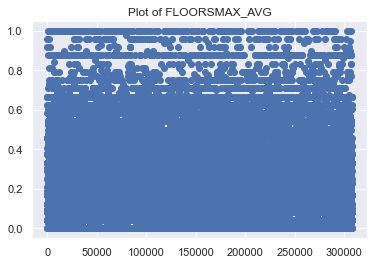

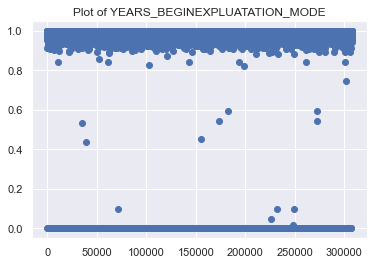

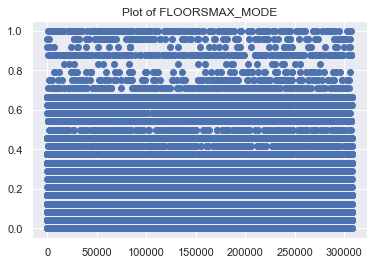

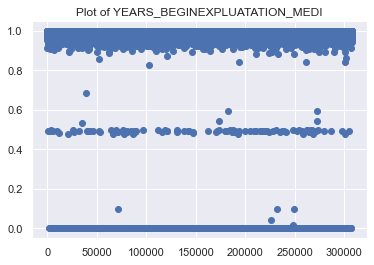

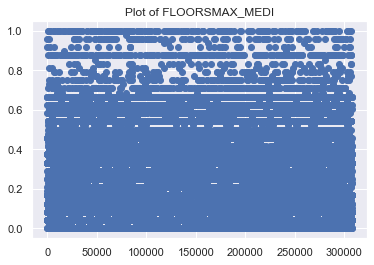

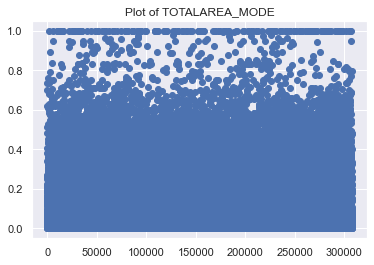

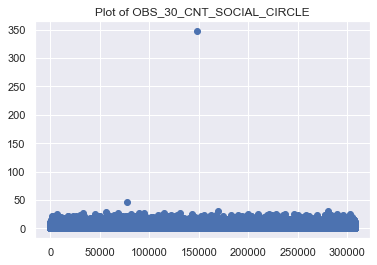

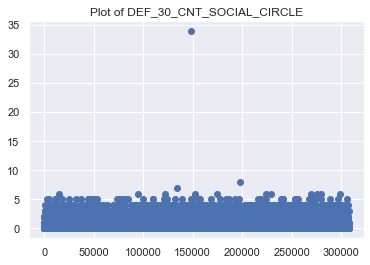

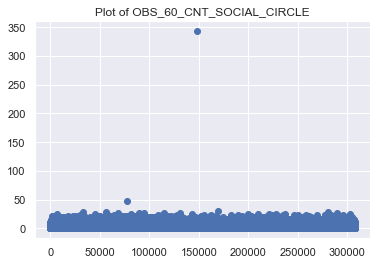

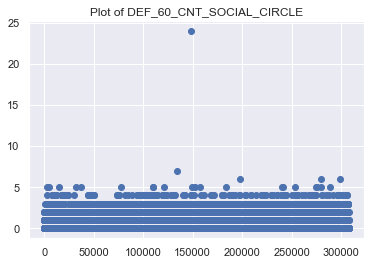

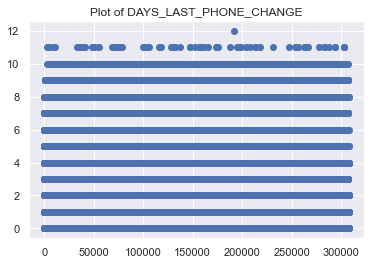

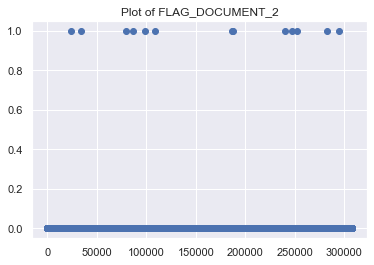

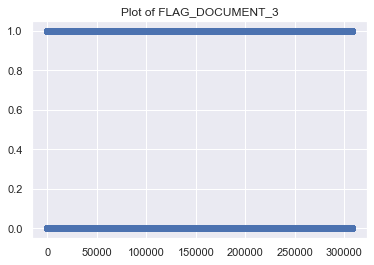

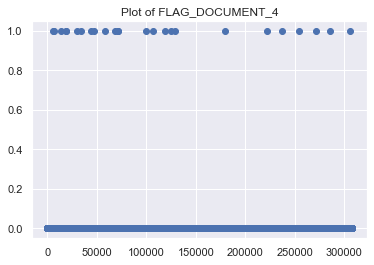

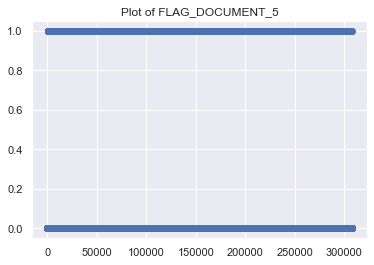

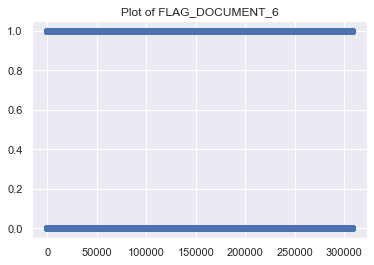

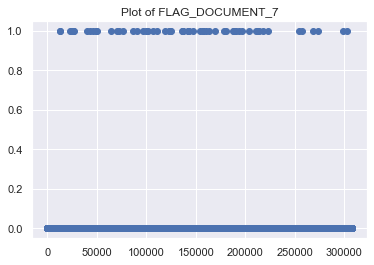

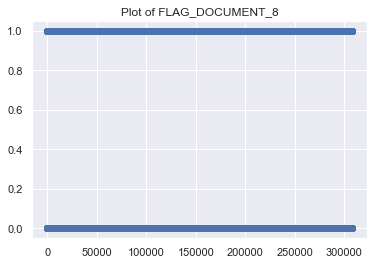

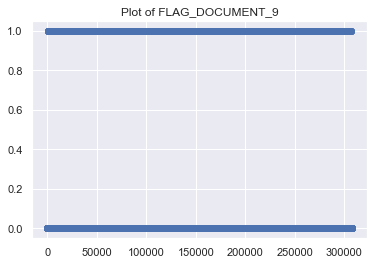

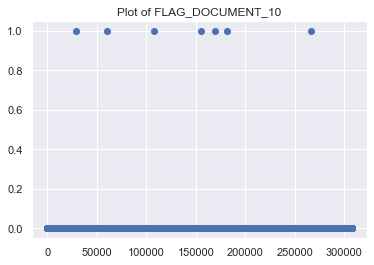

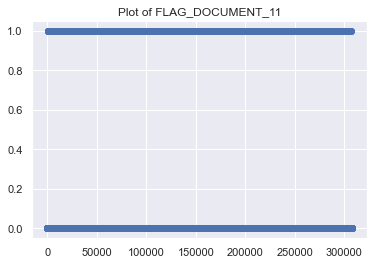

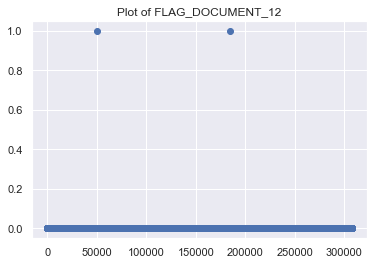

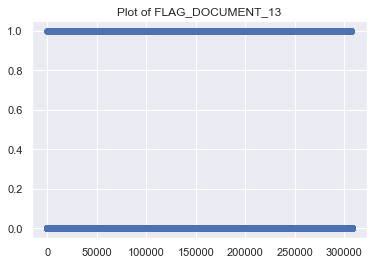

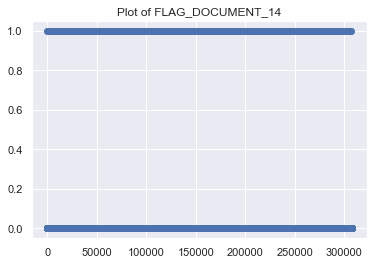

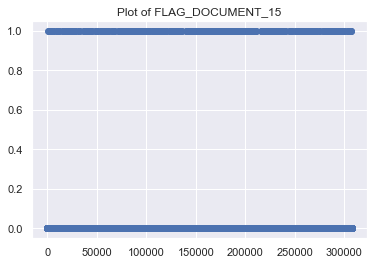

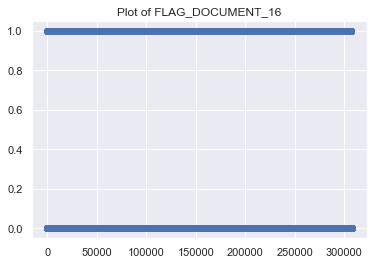

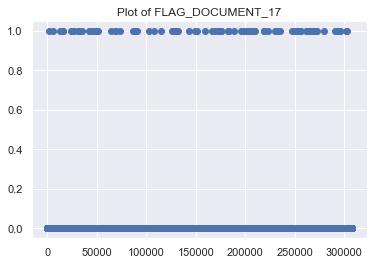

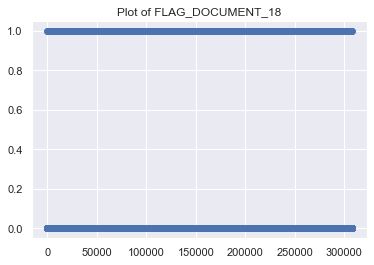

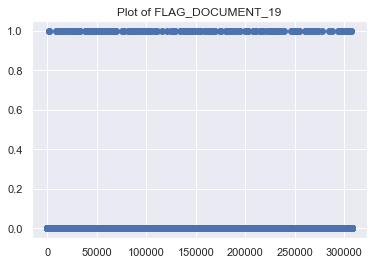

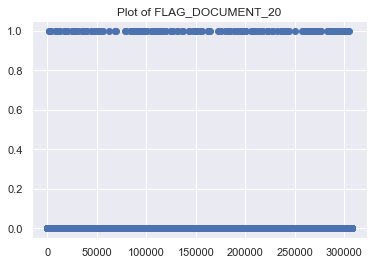

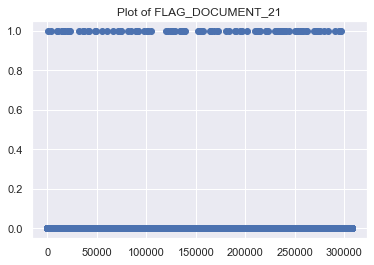

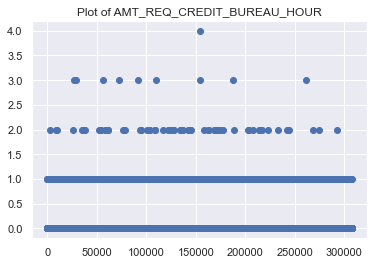

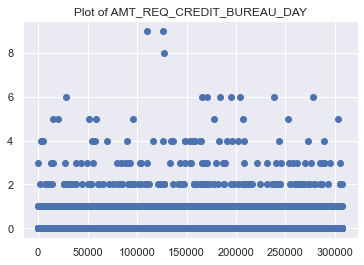

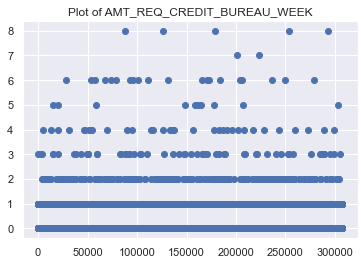

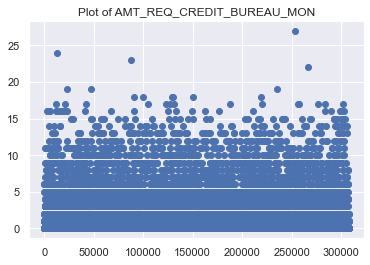

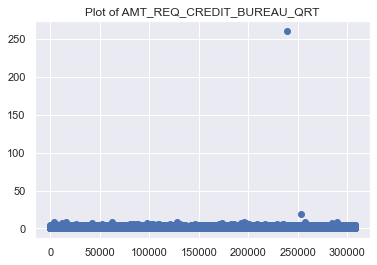

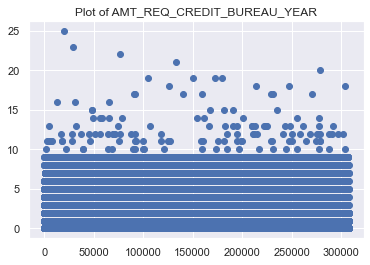

In [166]:
for column in num_col:
    title = "Plot of "+ column
    plt.scatter(Loan.index, Loan[column])
    plt.title(title)
    plt.show()

### Insight:

It can be seen that in current application data

AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.

AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants 
have high income when compared to the others.

DAYS_BIRTH has no outliers which means the data available is reliable.

DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is 
impossible and hence this is incorrect entry.

# Univariate Analysis for numerical data

For univariate analysis of the numerical columns, we will plot the histogram and the distribution plot

Plot of SK_ID_CURR


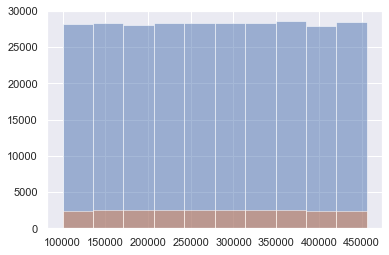

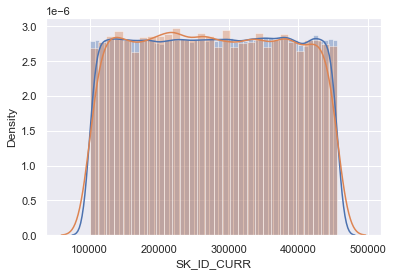

---------------------------------------------------------------------------------------------------------------------------
Plot of TARGET


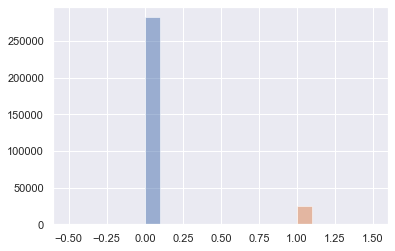

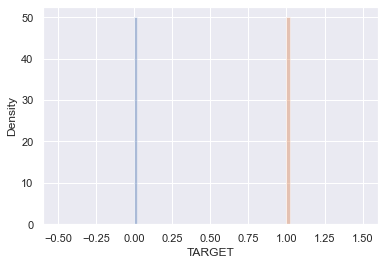

---------------------------------------------------------------------------------------------------------------------------
Plot of CNT_CHILDREN


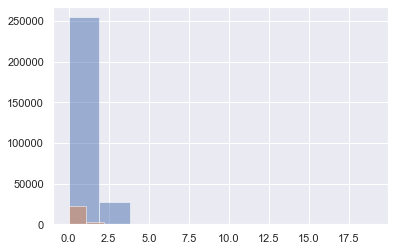

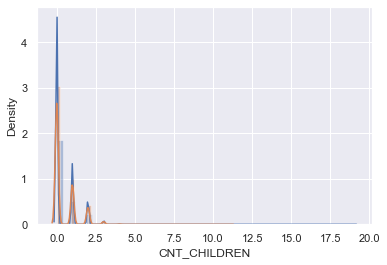

---------------------------------------------------------------------------------------------------------------------------
Plot of AMT_INCOME_TOTAL


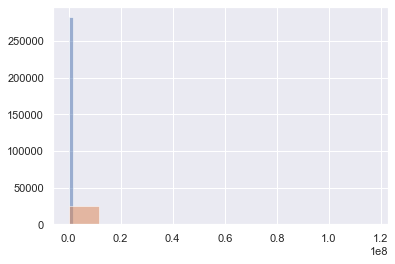

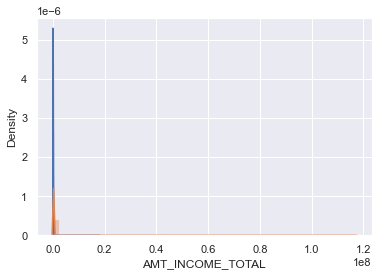

---------------------------------------------------------------------------------------------------------------------------
Plot of AMT_CREDIT


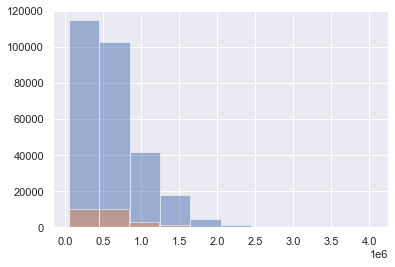

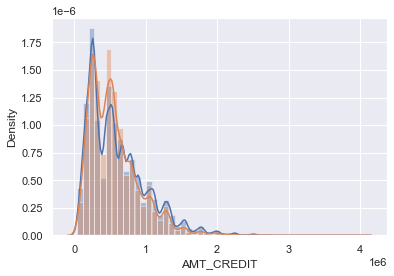

---------------------------------------------------------------------------------------------------------------------------
Plot of AMT_ANNUITY


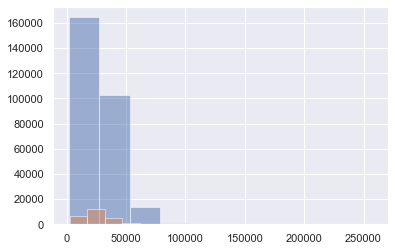

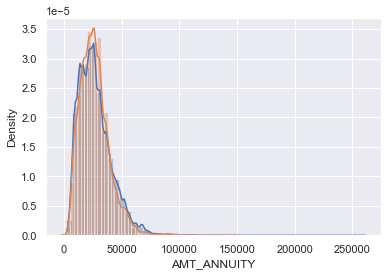

---------------------------------------------------------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE


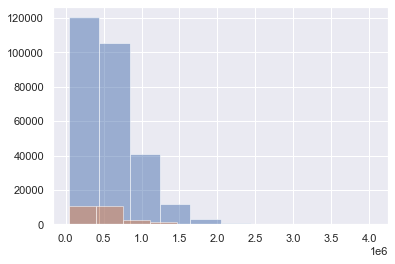

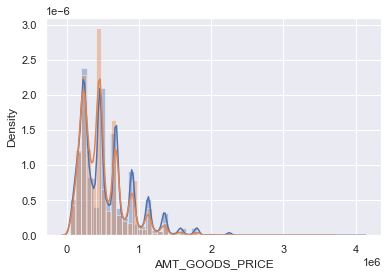

---------------------------------------------------------------------------------------------------------------------------
Plot of REGION_POPULATION_RELATIVE


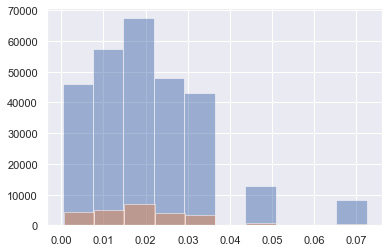

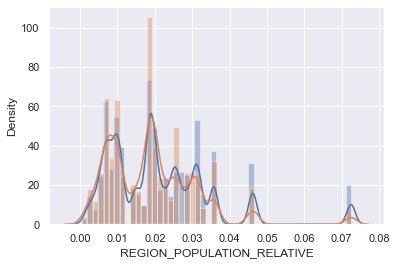

---------------------------------------------------------------------------------------------------------------------------
Plot of DAYS_BIRTH


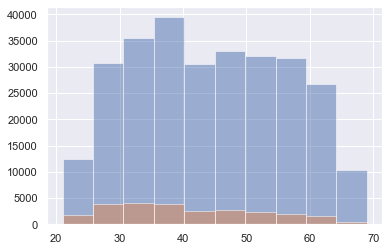

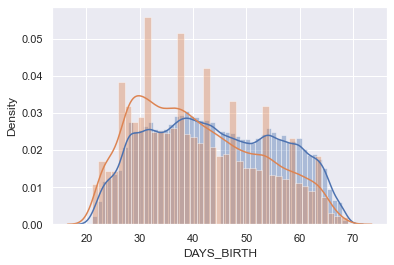

---------------------------------------------------------------------------------------------------------------------------
Plot of DAYS_EMPLOYED


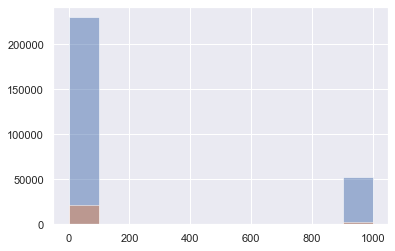

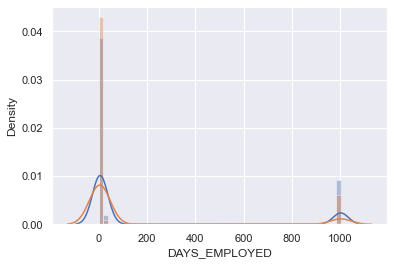

---------------------------------------------------------------------------------------------------------------------------
Plot of DAYS_REGISTRATION


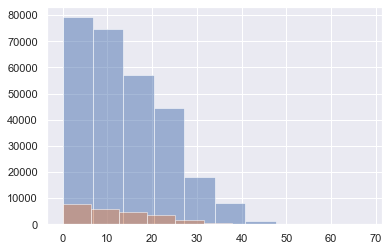

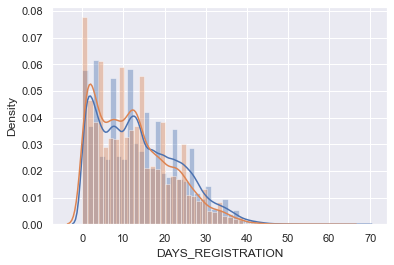

---------------------------------------------------------------------------------------------------------------------------
Plot of DAYS_ID_PUBLISH


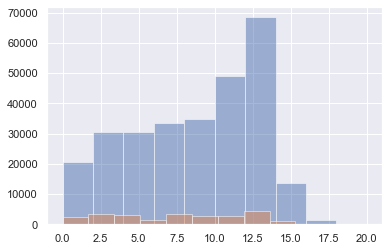

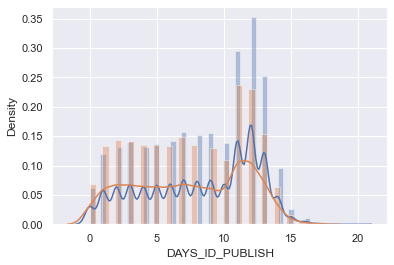

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_MOBIL


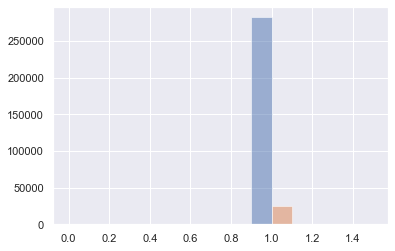

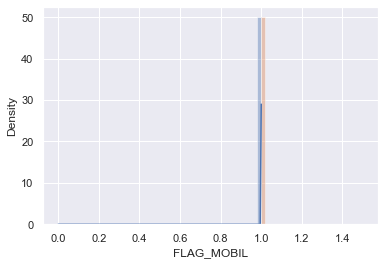

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_EMP_PHONE


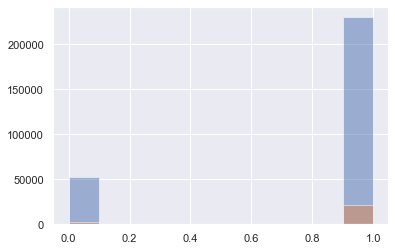

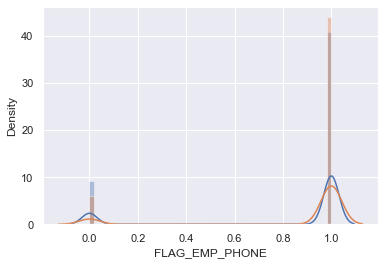

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_WORK_PHONE


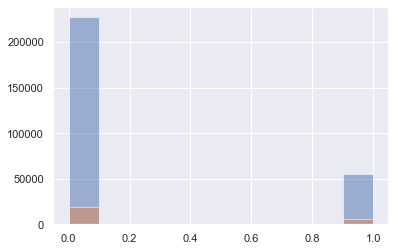

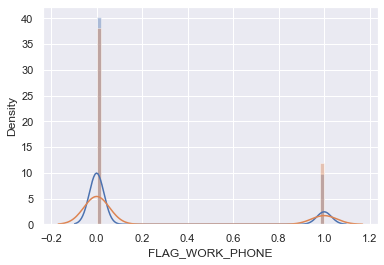

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_CONT_MOBILE


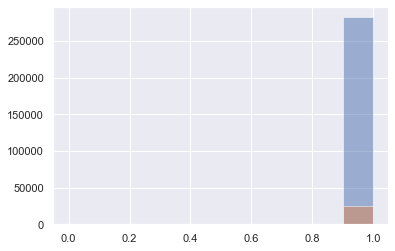

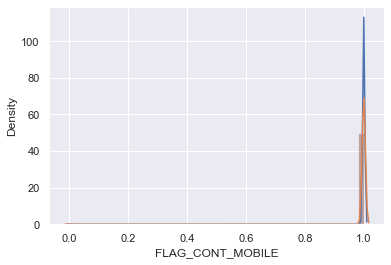

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_PHONE


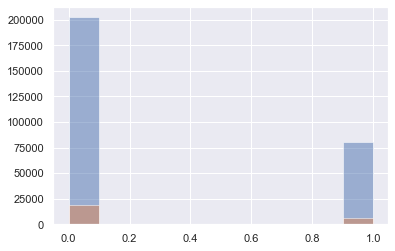

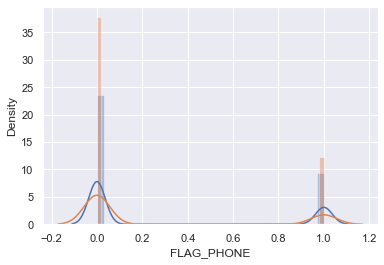

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_EMAIL


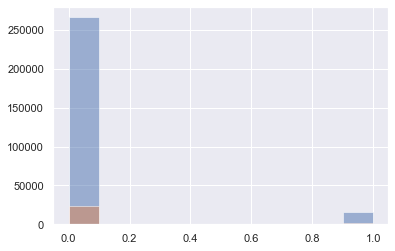

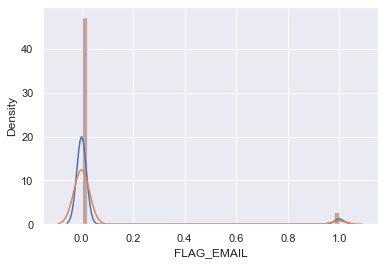

---------------------------------------------------------------------------------------------------------------------------
Plot of CNT_FAM_MEMBERS


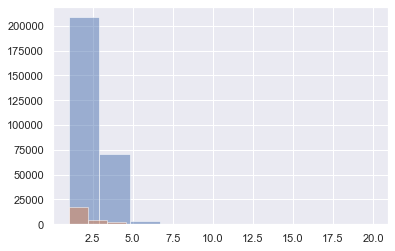

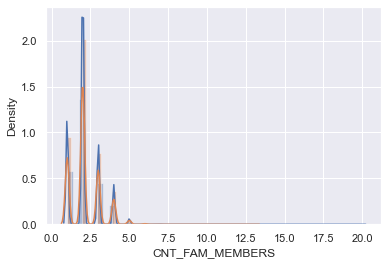

---------------------------------------------------------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT


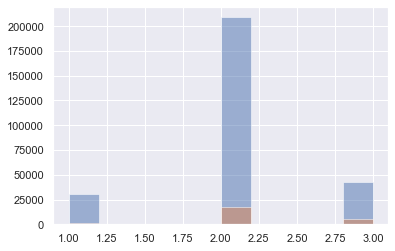

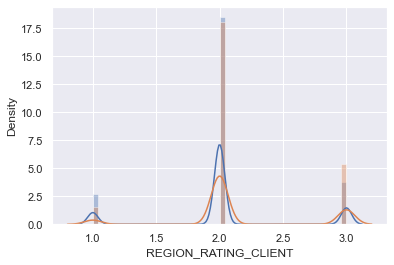

---------------------------------------------------------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT_W_CITY


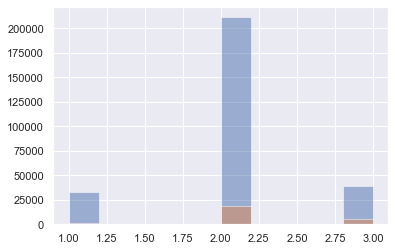

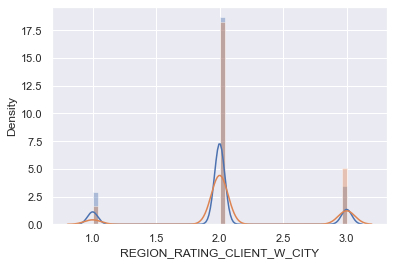

---------------------------------------------------------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START


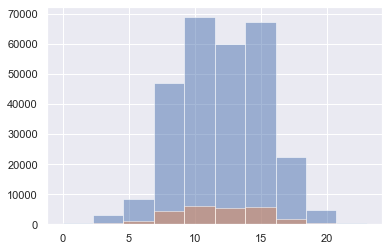

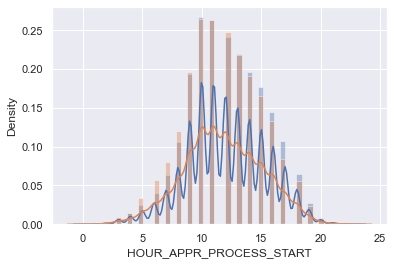

---------------------------------------------------------------------------------------------------------------------------
Plot of REG_REGION_NOT_LIVE_REGION


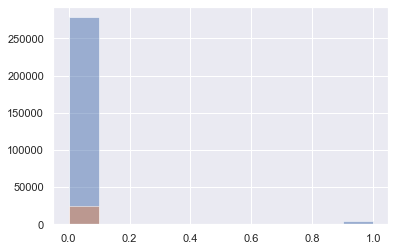

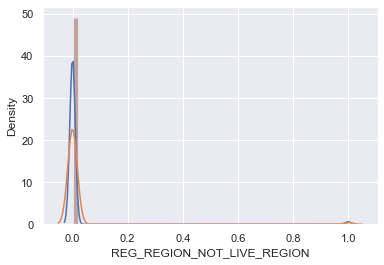

---------------------------------------------------------------------------------------------------------------------------
Plot of REG_REGION_NOT_WORK_REGION


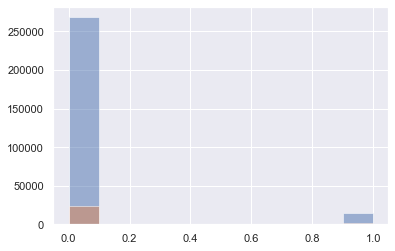

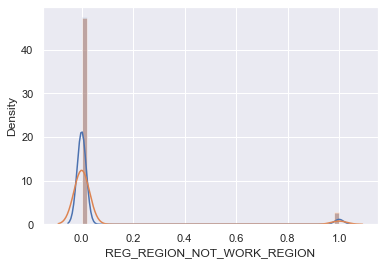

---------------------------------------------------------------------------------------------------------------------------
Plot of LIVE_REGION_NOT_WORK_REGION


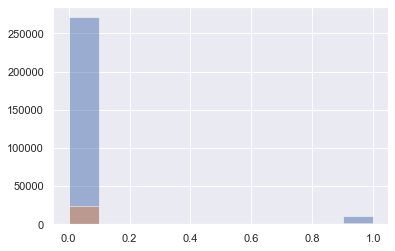

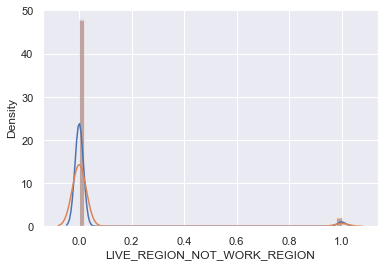

---------------------------------------------------------------------------------------------------------------------------
Plot of REG_CITY_NOT_LIVE_CITY


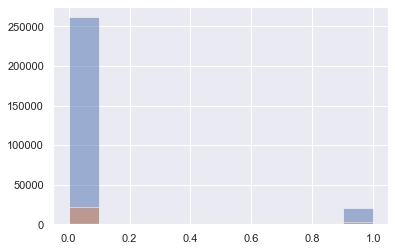

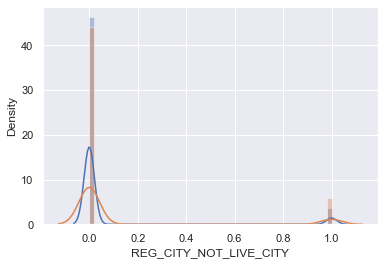

---------------------------------------------------------------------------------------------------------------------------
Plot of REG_CITY_NOT_WORK_CITY


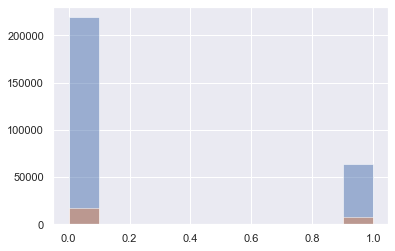

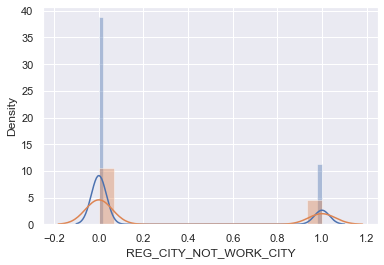

---------------------------------------------------------------------------------------------------------------------------
Plot of LIVE_CITY_NOT_WORK_CITY


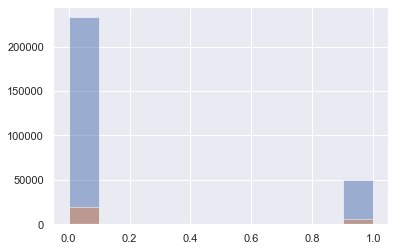

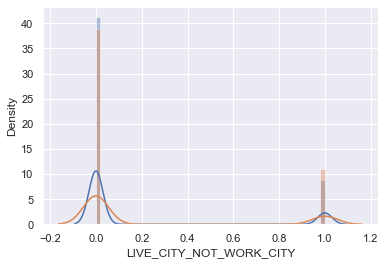

---------------------------------------------------------------------------------------------------------------------------
Plot of EXT_SOURCE_2


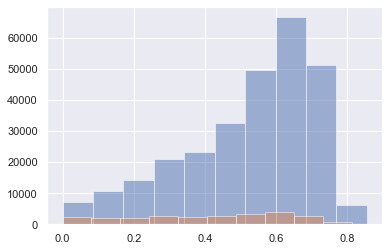

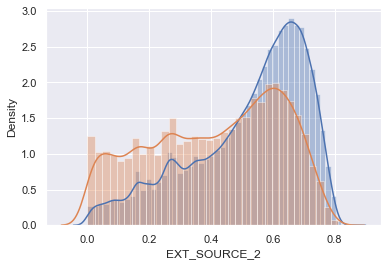

---------------------------------------------------------------------------------------------------------------------------
Plot of EXT_SOURCE_3


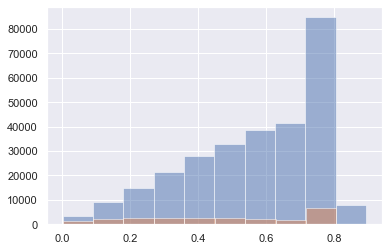

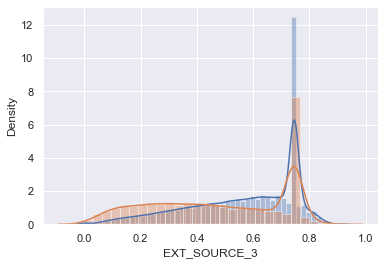

---------------------------------------------------------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_AVG


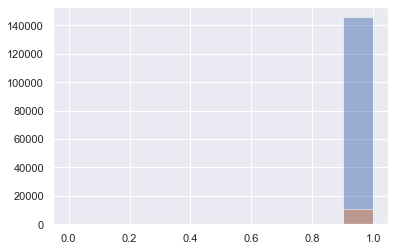

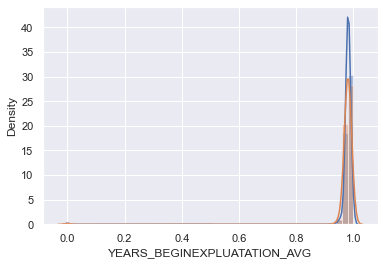

---------------------------------------------------------------------------------------------------------------------------
Plot of FLOORSMAX_AVG


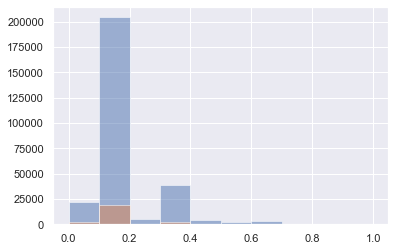

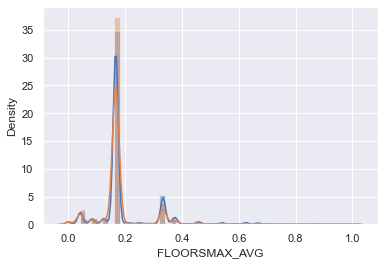

---------------------------------------------------------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MODE


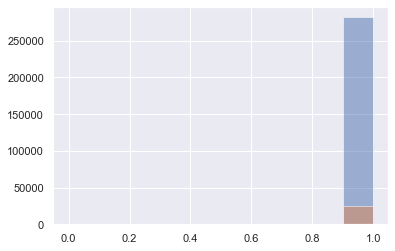

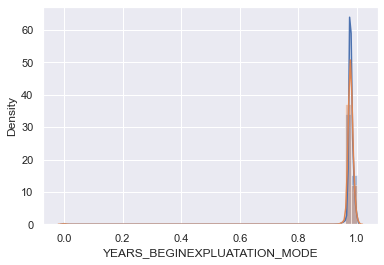

---------------------------------------------------------------------------------------------------------------------------
Plot of FLOORSMAX_MODE


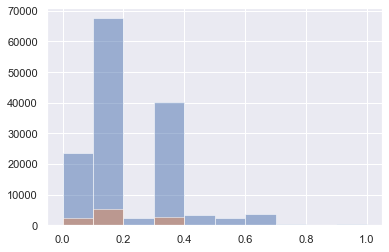

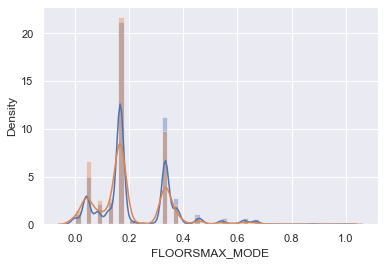

---------------------------------------------------------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MEDI


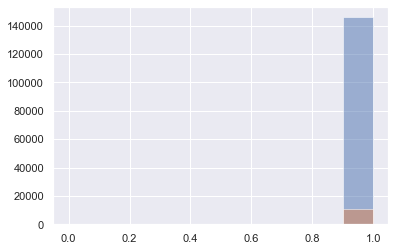

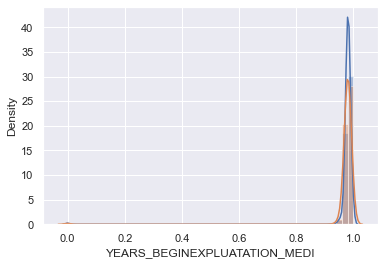

---------------------------------------------------------------------------------------------------------------------------
Plot of FLOORSMAX_MEDI


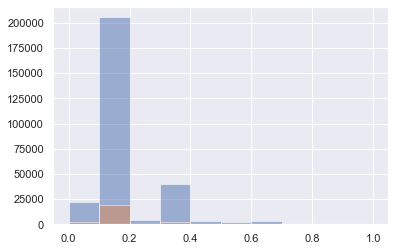

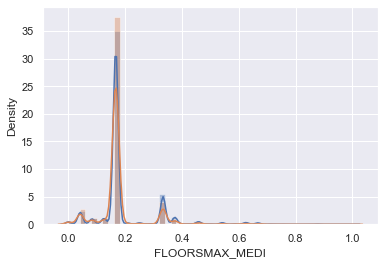

---------------------------------------------------------------------------------------------------------------------------
Plot of TOTALAREA_MODE


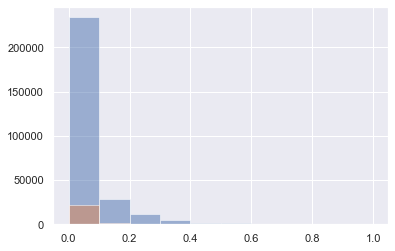

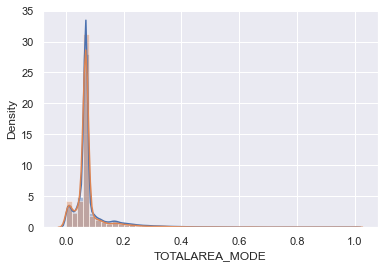

---------------------------------------------------------------------------------------------------------------------------
Plot of OBS_30_CNT_SOCIAL_CIRCLE


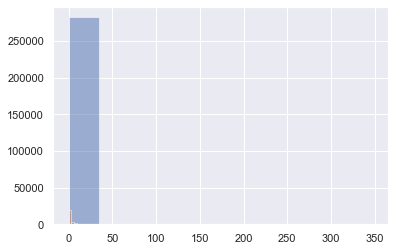

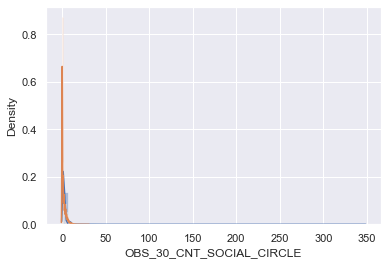

---------------------------------------------------------------------------------------------------------------------------
Plot of DEF_30_CNT_SOCIAL_CIRCLE


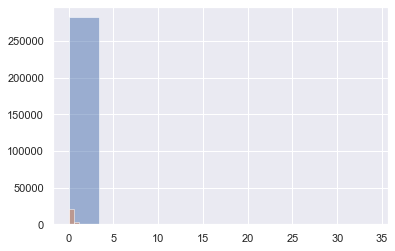

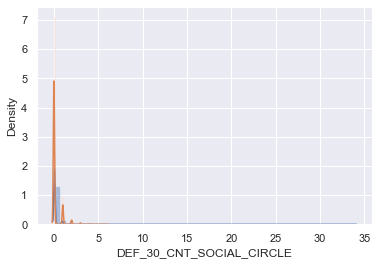

---------------------------------------------------------------------------------------------------------------------------
Plot of OBS_60_CNT_SOCIAL_CIRCLE


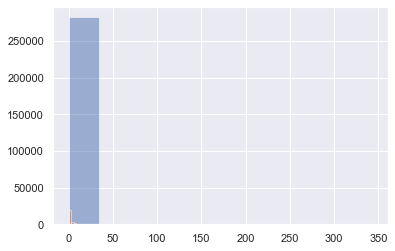

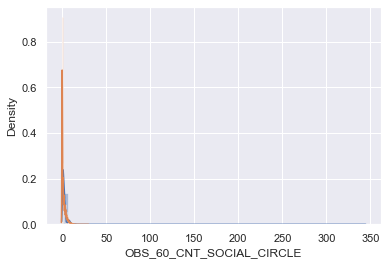

---------------------------------------------------------------------------------------------------------------------------
Plot of DEF_60_CNT_SOCIAL_CIRCLE


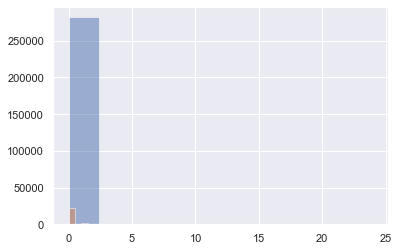

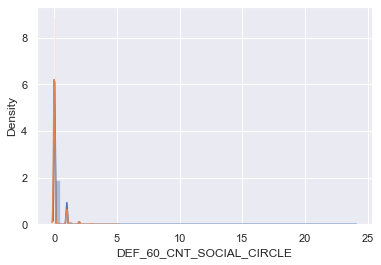

---------------------------------------------------------------------------------------------------------------------------
Plot of DAYS_LAST_PHONE_CHANGE


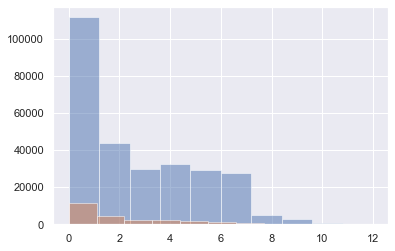

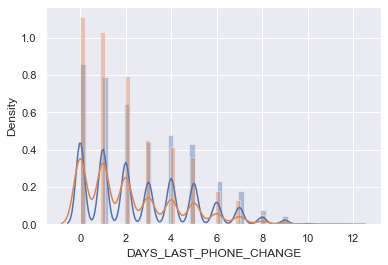

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_2


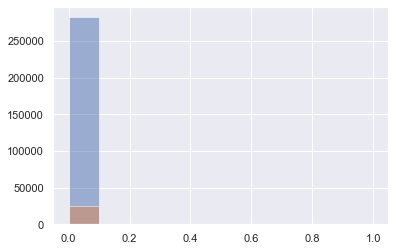

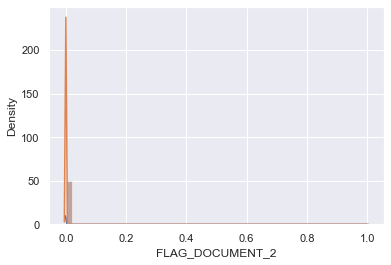

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_3


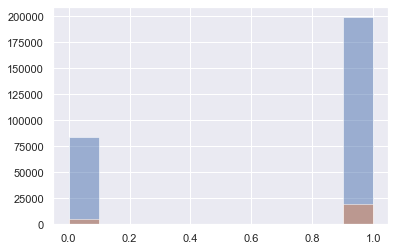

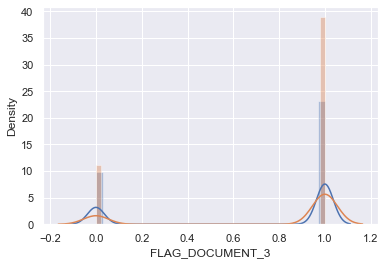

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_4


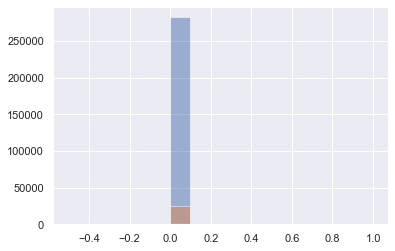

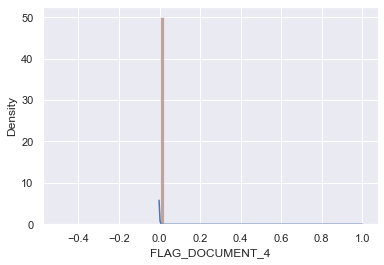

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_5


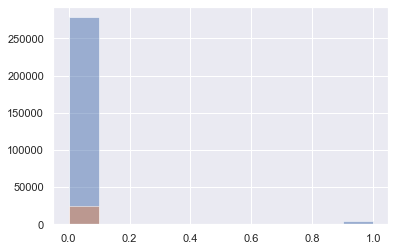

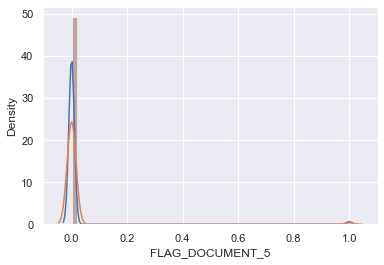

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_6


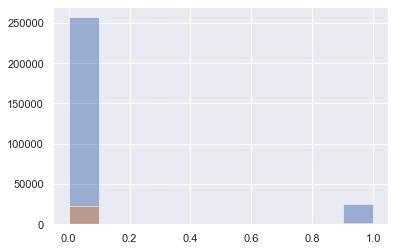

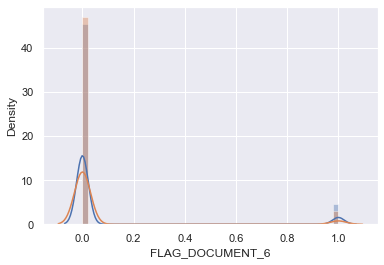

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_7


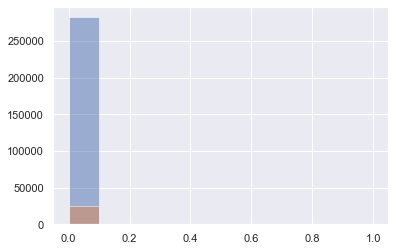

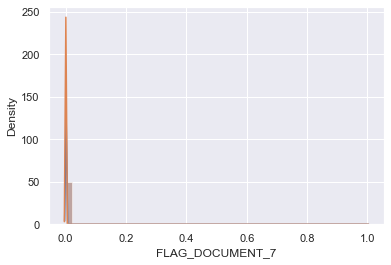

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_8


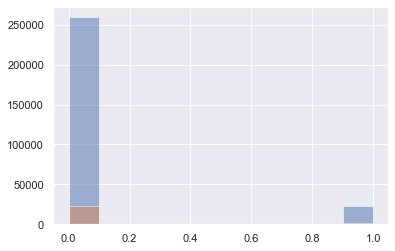

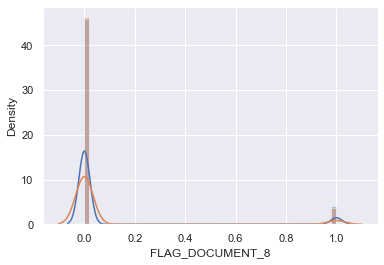

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_9


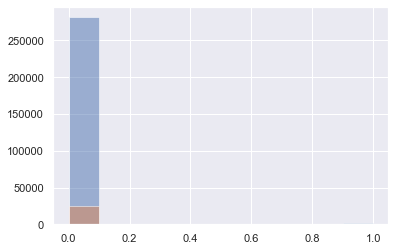

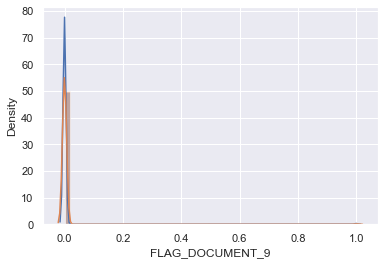

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_10


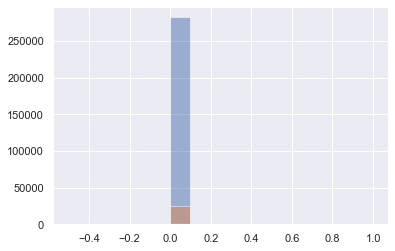

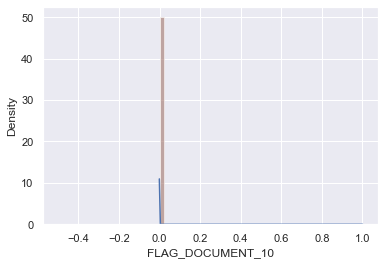

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_11


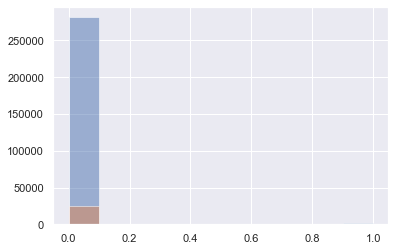

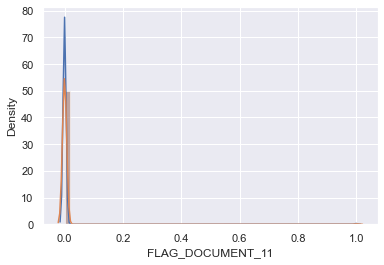

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_12


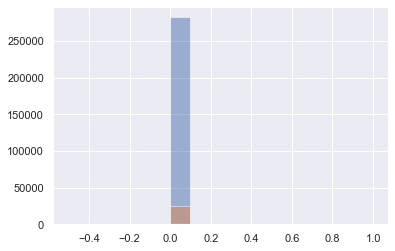

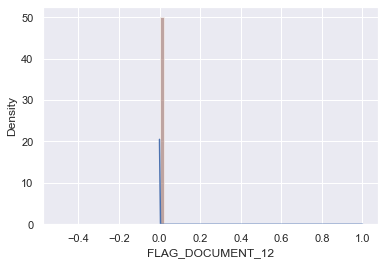

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_13


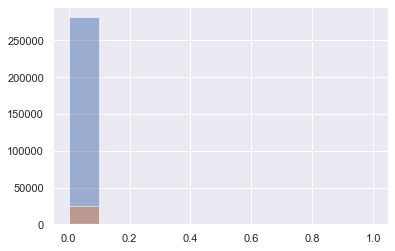

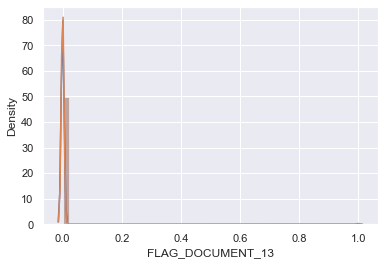

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_14


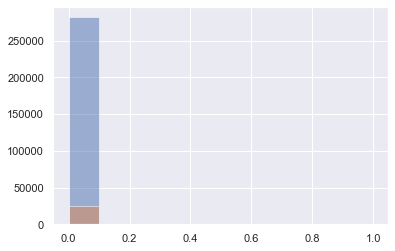

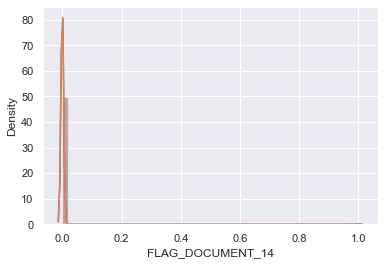

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_15


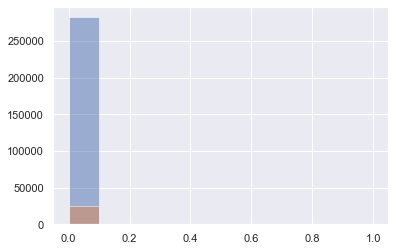

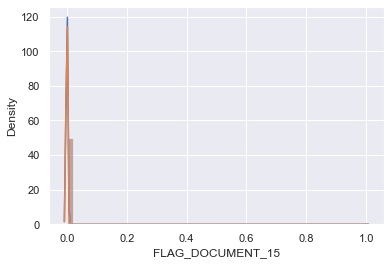

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_16


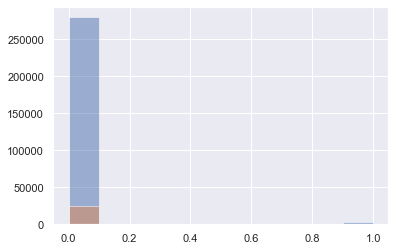

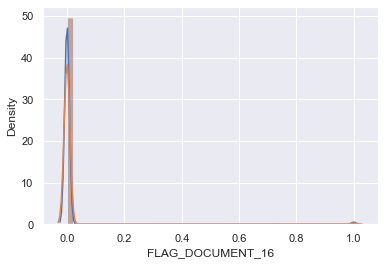

---------------------------------------------------------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_17


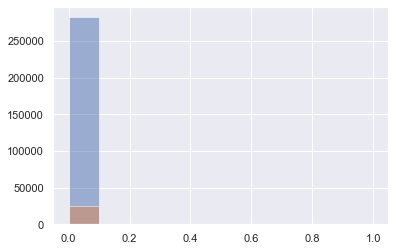

KeyboardInterrupt: 

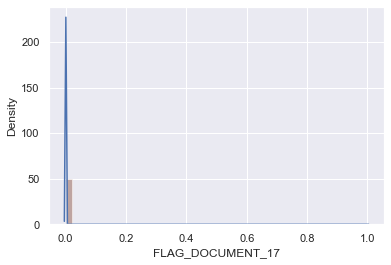

In [169]:
for column in num_col:
    title = "Plot of "+column
    print(title)
    plt.hist(Loan_0[column], alpha=0.5, label='0')
    plt.hist(Loan_1[column], alpha=0.5, label='1')
    plt.show()
    
    sns.distplot(Loan_0[column].dropna(), label='0')
    sns.distplot(Loan_1[column].dropna(),  label='1')
    
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------------")

### Insights
Most no. of loans are given for goods price below 10 lakhs

Most people pay annuity below 50K for the credit loan

Credit amount of the loan is mostly less then 10 lakhs


The columns which seems different where both the histogram and distribution plot are different for the target = 0 and 
target = 1 are:

AMT_CREDIT,
HOURS_APPR_PROCESS_START,
EXT_SOUCE_2,
EXT_SOURCE_3,
AMT_ANNUITY,
AMT_GOODS_PRICE,
DAYS_BIRTH,
AMT_REQ_CREDIT_BUREAU_YEAR

# Reading previous application

In [170]:
previous_app = pd.read_csv('previous_application.csv')
previous_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [171]:
# Shape of previous application
previous_app.shape

(1670214, 37)

Insight : There are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times

In [172]:
# Number of unique id in previous application
previous_app.SK_ID_PREV.value_counts()

1001961    1
1210139    1
1279781    1
1281828    1
1292067    1
          ..
2444802    1
2446849    1
2448896    1
1024863    1
1000983    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [173]:
# Number of unique id in previous application
previous_app.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
310932     1
308885     1
317081     1
335520     1
350314     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

### Insights 
As we find in above details, the shape of previous application is (1670214, 37) and length of SK_ID_PREV is also 
(1670214), but length of SK_ID_CURR is (338857), which is less than length of SK_ID_PREV, so there are duplicate number of SK_ID_PREV


# Now merging dataframe: Loan and previous application based on SK_ID_PREV

In [174]:
previous_Loan = Loan.merge(previous_app, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [175]:
previous_Loan.shape

(1413701, 118)

In [176]:
previous_Loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object', length=118)

In [177]:
previous_Loan.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPL

# Segregating the dataset on Target=0 and Target=1

In [178]:
pLoan_0 = previous_Loan.loc[previous_Loan['TARGET'] == 0]
pLoan_1 = previous_Loan.loc[previous_Loan['TARGET'] == 1]

# Plotting Graph

In [179]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    Loan[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((Loan_0[col].value_counts())/len(Loan_0))
    df['1']= ((Loan_1[col].value_counts())/len(Loan_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=pLoan_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=pLoan_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
    

# Bivariate Analysis

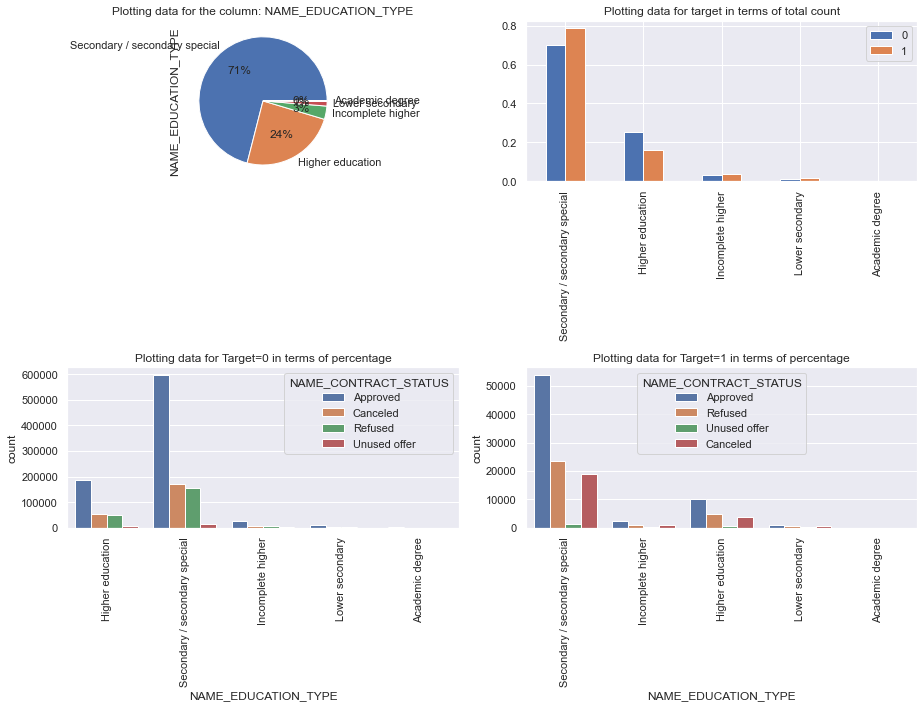

In [180]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS') 

Insight : People tend to make more loan for 'Secondary special' and their loan is also approved.

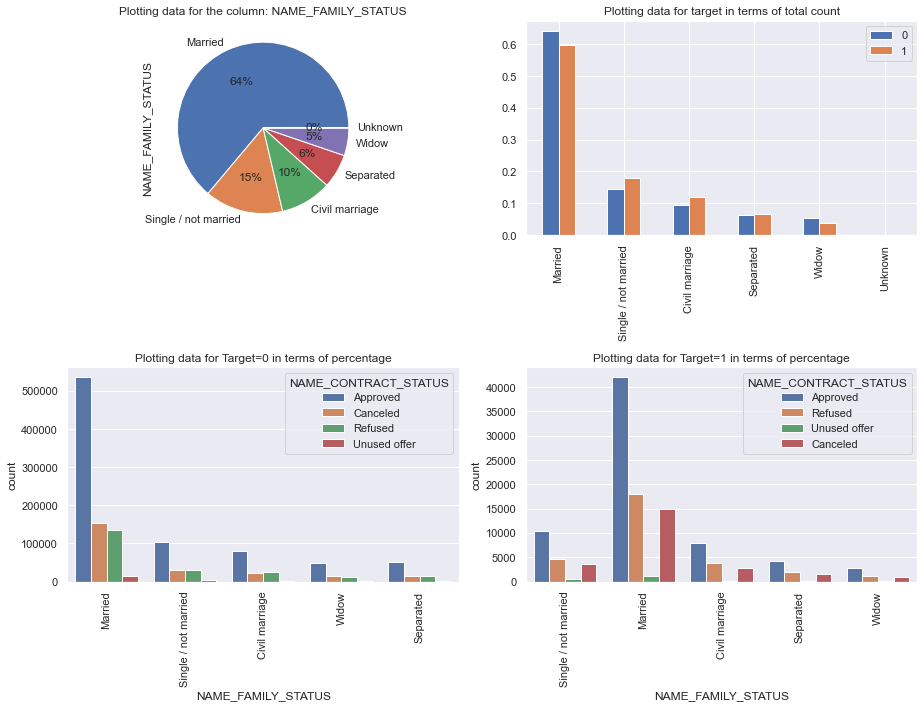

In [181]:
plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')    

Insight : You can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: Married. Married people tends to pay loan on time than Singles.

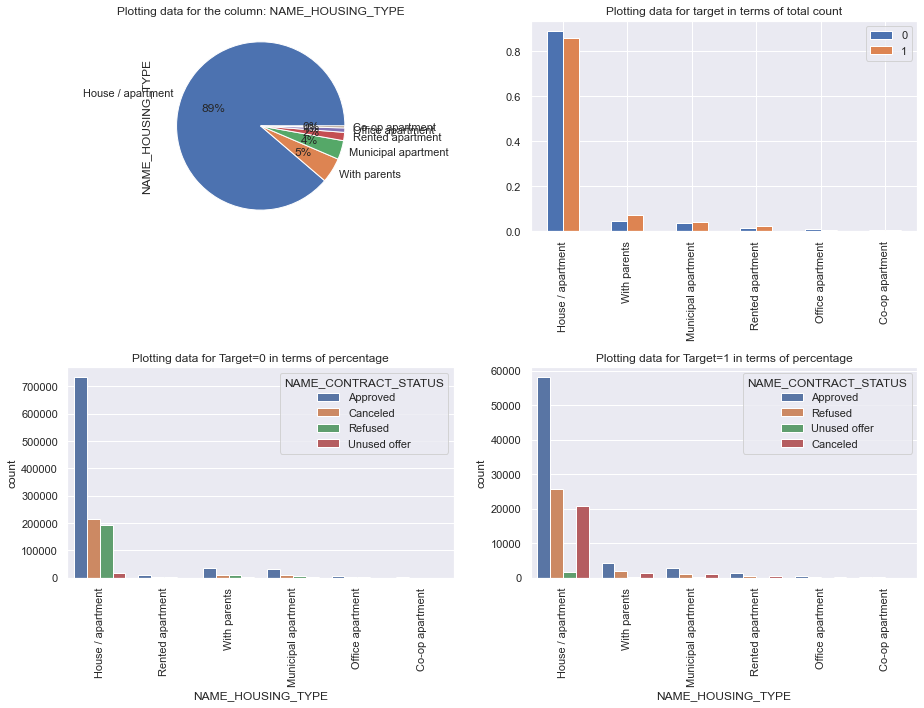

In [182]:
plotting('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')   

Insight : You can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: House/apartment.

<AxesSubplot:>

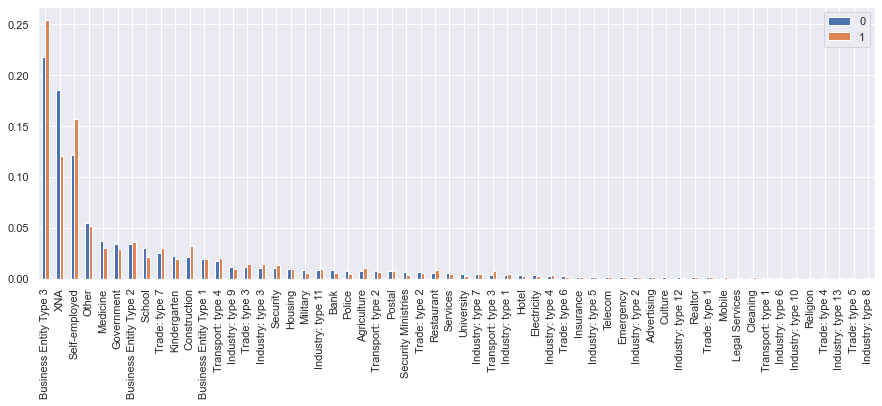

In [183]:
col = 'ORGANIZATION_TYPE'
df = pd.DataFrame()
df['0']= ((Loan_0[col].value_counts())/len(Loan_0))
df['1']= ((Loan_1[col].value_counts())/len(Loan_1))
sns.set(rc={'figure.figsize':(15,5)})
df.plot.bar()

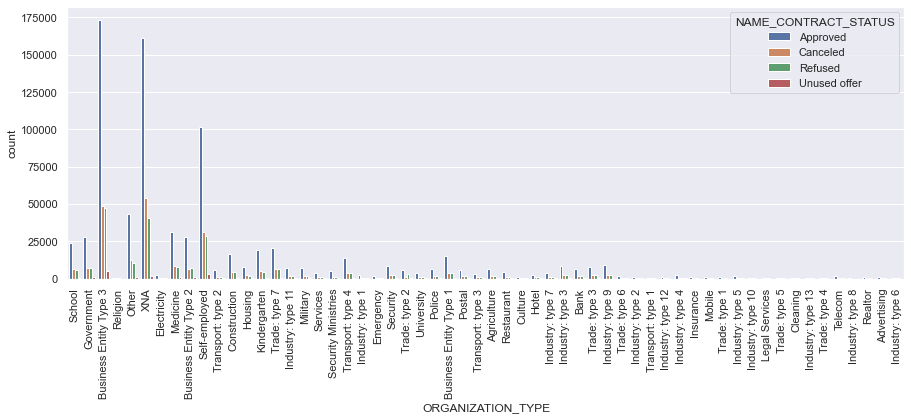

In [184]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=pLoan_0)
plt.xticks(rotation=90)
plt.show()

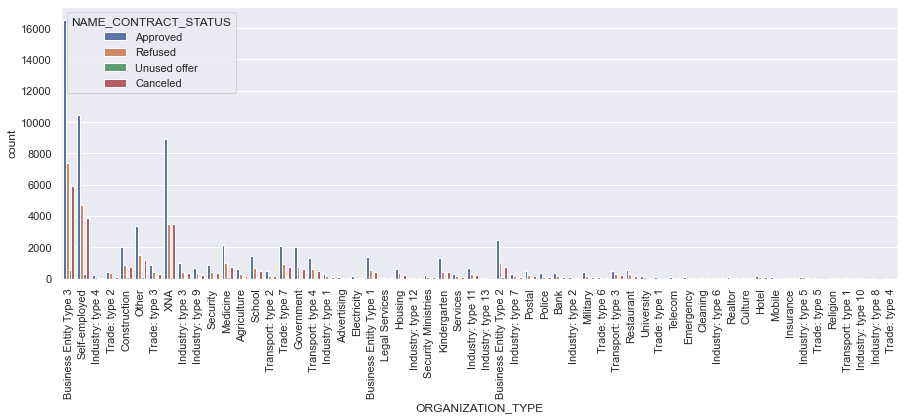

In [185]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=pLoan_1)
plt.xticks(rotation=90)
plt.show()

Insight : This columns seems to be most important. Bussiness Entity Type 3 and Self-employed tends to be the maxiumum defaulter. The univariate analysis of this dataset was more fruitful than bivariate analysis.